<div style="
    position: relative; 
    width: 100%; 
    height: 330px; 
    border-radius: 16px; 
    overflow: hidden; 
    background-color: #1a1a2e;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.5);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/0e/e5/1e/0ee51e59c19969679741503eed928888.jpg'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.75) contrast(1.1); /* Enhanced depth */
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        background: rgba(15, 15, 25, 0.45); 
        backdrop-filter: blur(14px); 
        -webkit-backdrop-filter: blur(14px); 
        border: 1px solid rgba(255, 255, 255, 0.18);
        padding: 45px 65px; 
        border-radius: 24px; 
        text-align: center;
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.4), 
                    inset 0 0 15px rgba(255, 255, 255, 0.05); /* Inner glow */
        width: 75%;
        max-width: 700px;
    ">
        <h1 style="
            margin: 0; 
            font-family: 'Inter', 'Segoe UI', system-ui, sans-serif; 
            font-weight: 900; 
            font-size: 3.2em; 
            letter-spacing: -1px; /* Modern tight tracking */
            line-height: 1.1;
            color: #ffffff;
            text-shadow: 0px 4px 20px rgba(0,0,0,0.4);
        ">
            Predicting <span style="color: #00ffff; text-shadow: 0 0 15px rgba(0,255,255,0.4);">Heart</span> Disease
        </h1>
        <div style="
            width: 60px; 
            height: 4px; 
            background: linear-gradient(90deg, #00ffff, #008080); 
            margin: 20px auto;
            border-radius: 10px;
            box-shadow: 0 0 12px rgba(0, 255, 255, 0.6);
        "></div>
        <p style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-size: 1em; 
            font-weight: 700; 
            letter-spacing: 4px; 
            color: rgba(255, 255, 255, 0.9);
            text-transform: uppercase;
        ">
            EDA <span style="color: #00ffff;">|</span> CATBoost <span style="color: #00ffff;">|</span> RealMLP
        </p>
    </div>
</div>
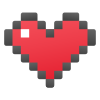

# 💘 Playground Series - Season 6, Episode 2: Predicting Heart Disease

## Overview

* **Competition Type:** Binary Classification (Tabular Data)
* **Goal:** Predict the probability of a patient having heart disease (`Presence` or `Absence`).
* **Evaluation Metric:** Area Under the ROC Curve (**AUC-ROC**).

---

##  Dataset Description
### Key Features
| Feature | Description |
| :--- | :--- |
| **Age** | Patient's age in years. |
| **Sex** | Biological sex of the patient. |
| **Chest pain type** | Categorical type of chest pain (e.g., typical angina, atypical angina). |
| **BP** | Resting blood pressure (mm Hg). |
| **Cholesterol** | Serum cholesterol in mg/dl. |
| **FBS over 120** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false). |
| **EKG results** | Resting electrocardiographic results. |
| **Max HR** | Maximum heart rate achieved during stress test. |
| **Exercise angina** | Exercise-induced angina (1 = yes; 0 = no). |
| **ST depression** | ST depression induced by exercise relative to rest. |
| **Slope of ST** | The slope of the peak exercise ST segment. |
| **Thallium** | Thallium stress test result. |


---
 



In [1]:
import os
import time
import warnings
import random
import pandas as pd
import numpy as np
import datetime as dt
from tqdm.notebook import tqdm
from typing import Dict, List, Tuple

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

!pip install optuna-integration[lightgbm]
!pip install optuna
import optuna
from tqdm.notebook import tqdm
import lightgbm as lgb
import xgboost as xgb
from optuna.integration import LightGBMPruningCallback, XGBoostPruningCallback
from sklearn.linear_model import LogisticRegression

import sklearn
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold, StratifiedShuffleSplit, ShuffleSplit
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support,
    accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer, LabelEncoder, RobustScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

!pip install catboost
!pip uninstall -y pytabkit pytorch-lightning torchmetrics torchvision
!pip install torch==2.3.1
!pip install torchvision 
!pip install pytabkit

from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from pytabkit import RealMLP_TD_Classifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from typing import List, Tuple, Dict, Any
print("Required libraries installed and imported.")

import subprocess

packages_to_install = [
    'scikit-learn==1.6.1',
    'tqdm==4.67.3',
    'optuna==4.7.0'
]

for pkg in packages_to_install:
    try:
        print(f"Installing {pkg}...")
        result = subprocess.run(['pip', 'install', pkg], capture_output=True, text=True, check=True)
        print(result.stdout)
        if result.stderr:
            print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error installing {pkg}: {e.stderr}")
    except FileNotFoundError:
        print("Error: pip command not found. Please ensure pip is installed.")

print("All required libraries installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 2.9 MB/s eta 0:00:00
Found existing installation: pytorch-lightning 2.6.0
Uninstalling pytorch-lightning-2.6.0:
  Successfully uninstalled pytorch-lightning-2.6.0
Found existing installation: torchmetrics 1.8.2
Uninstalling torchmetrics-1.8.2:
  Successfully uninstalled torchmetrics-1.8.2
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 946.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

## <span style="font-size:0px; opacity:0; position:absolute;">1. Setup & Data Loading </span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 80%; /* Limits width so it doesn't touch edges */
        max-width: 600px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; /* Reduced padding (was 40px 60px) */
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.8em; /* Reduced from 3em */
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
            white-space: nowrap; /* Prevents text from wrapping awkwardly */
        ">
             Setup & Data Loading
        </span>
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; /* Reduced margin */
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div> 
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; /* Reduced from 0.9em */
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Seed | Imports | Params
        </p>
    </div>
</div>

In [2]:


# --- Global Configuration Parameters ---
SEED = 42
SEEDS = [SEED]
FOLDS = 5

ACTIVE_MODEL = 'Ensemble'


TRAIN_PATH = '/kaggle/input/playground-series-s6e2/train.csv'
TEST_PATH = '/kaggle/input/playground-series-s6e2/test.csv'
SAMPLE_SUBMISSION_PATH = '/kaggle/input/playground-series-s6e2/sample_submission.csv'

# Feature lists
NUM_COLUMNS = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
CAT_COLUMNS = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
               'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

heart_disease_mapping = {'Absence': 0, 'Presence': 1}

ADD_EXTERN_DATA = False
USE_EXTERNAL_FEATS = False

# --- Model-specific Hyperparameters ---

CATBOOST_PARAMS = {
    'iterations': 1,
    'learning_rate': 0.02,
    'depth': 2,
    'min_data_in_leaf': 1,
    'eval_metric': 'AUC',
    'auto_class_weights': 'Balanced',
    'bootstrap_type': 'Bernoulli',   
    'early_stopping_rounds': 300,
    'verbose': False,
    'subsample': 0.9,
    'random_seed': SEED
}



REALMLP_TD_PARAMS = {
    'device': 'cpu',   #cuda
    'random_state': SEED,
    'verbosity': 2,
    'n_epochs': 1,
    'batch_size': 256,
    'n_ens': 8,
    'use_early_stopping': True,
    'early_stopping_additive_patience': 20,
    'early_stopping_multiplicative_patience': 1,
    'act': "mish",
    'embedding_size': 8,
    'first_layer_lr_factor': 0.5962121993798933,
    'hidden_sizes': "rectangular",
    'hidden_width': 384,
    'lr': 0.04,
    'ls_eps': 0.011498317194338772,
    'ls_eps_sched': "coslog4",
    'max_one_hot_cat_size': 18,
    'n_hidden_layers': 4,
    'p_drop': 0.07301419697186451,
    'p_drop_sched': "flat_cos",
    'plr_hidden_1': 16,
    'plr_hidden_2': 8,
    'plr_lr_factor': 0.1151437622270563,
    'plr_sigma': 2.3316811282666916,
    'scale_lr_factor': 2.244801835541429,
    'sq_mom': 1.0 - 0.011834054955582318,
    'wd': 0.02369230879235962,
}

def set_seed(seed_value=SEED):
    np.random.seed(seed_value)
    random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    if 'torch' in globals():
        import torch
        torch.manual_seed(seed_value)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(seed_value)
            torch.cuda.manual_seed_all(seed_value)
            torch.backends.cudnn.deterministic = True
            torch.backends.cudnn.benchmark = False

set_seed(SEED)

print("Configuration loaded.")

Configuration loaded.


In [3]:


df_train_raw = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df_train = df_train_raw.copy()

def load_and_prepare_initial_data(
    train_csv_path: str,
    test_csv_path: str,
    heart_disease_map: Dict[str, int]
) -> Tuple[pd.DataFrame, pd.Series, np.ndarray, pd.DataFrame]:

    print("Preparing initial data...")

    # Load dataframes
    df_train_raw = pd.read_csv(train_csv_path)
    df_test = pd.read_csv(test_csv_path)

    df_train = df_train_raw.copy()

    print("Encoding 'Heart Disease' target variable...")
    # Encode 'Heart Disease' target variable
    if 'Heart Disease' in df_train.columns:
        if df_train['Heart Disease'].dtype == 'object':
            df_train['Heart Disease'] = df_train['Heart Disease'].map(heart_disease_map).astype(np.uint8)
        else:
            if not pd.api.types.is_unsigned_integer_dtype(df_train['Heart Disease']):
                df_train['Heart Disease'] = df_train['Heart Disease'].astype(np.uint8)
    else:
        raise ValueError("'Heart Disease' column not found in training data.")

    # Separate features and target
    X = df_train.drop(['id', 'Heart Disease'], axis=1)
    y = df_train['Heart Disease']
    test_ids = df_test['id'].values
    X_test = df_test.drop(['id'], axis=1)

    print(f"Initial data prepared. X shape: {X.shape}, y shape: {y.shape}, X_test shape: {X_test.shape}")
    return X, y, test_ids, X_test

print("data_loader functions defined.")

data_loader functions defined.


## <span style="font-size:0px; opacity:0; position:absolute;">2. Exploratory Data Analysis</span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 80%; 
        max-width: 600px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.8em; 
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
            white-space: nowrap; 
        ">
             Exploratory Data Analysis
        </span>      
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>     
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Trends | Patterns | Correlations
        </p>
    </div>
</div>


## 2.1 Data Information

In [4]:
def data_info(df, df_name):

    print(f"\n{'='*80}")
    print(f"📊 Comprehensive Information for DataFrame: {df_name}")
    print(f"{'='*80}\n")

    # --- Shape ---
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

    # --- Head ---
    print(f"--- {df_name} Head ---\n")
    display(df.head().style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
        {'selector': 'td', 'props': [('font-size', '10pt')]}
    ], overwrite=False))

    # --- Column Summary ---
    print(f"\n--- {df_name} Column Summary ---\n")
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "Non-Null Count": df.notnull().sum(),
        "Unique Values": df.nunique(),
        "Missing Values": df.isnull().sum(),
        "Missing %": (df.isnull().sum() / len(df)) * 100
    })
    display(summary.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
        {'selector': 'td', 'props': [('font-size', '10pt')]}
    ], overwrite=False))

    # --- Describe (numeric only) ---
    if df.select_dtypes(include=np.number).shape[1] > 0:
        print(f"\n--- {df_name} Numeric Summary ---\n")
        display(df.describe().style.set_table_styles([
            {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
            {'selector': 'td', 'props': [('font-size', '10pt')]}
        ], overwrite=False))

    # --- Describe (categorical only) ---
    cat_cols = df.select_dtypes(exclude=np.number).columns
    if len(cat_cols) > 0:
        print(f"\n--- {df_name} Categorical Summary ---\n")
        cat_summary = df[cat_cols].describe().transpose()
        display(cat_summary.style.set_table_styles([
            {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
            {'selector': 'td', 'props': [('font-size', '10pt')]}
        ], overwrite=False))

    print(f"\n{'='*80}\n")

data_info(df_train, "df_train")
data_info(df_test, "df_test")
# data_info(df_orig_raw, "df_orig")


📊 Comprehensive Information for DataFrame: df_train

Shape: 630000 rows × 15 columns

--- df_train Head ---



,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.600000,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.000000,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.000000,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.000000,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.800000,2,3,3,Presence



--- df_train Column Summary ---



,DataType,Non-Null Count,Unique Values,Missing Values,Missing %
id,int64,630000,630000,0,0.000000
Age,int64,630000,42,0,0.000000
Sex,int64,630000,2,0,0.000000
Chest pain type,int64,630000,4,0,0.000000
BP,int64,630000,66,0,0.000000
Cholesterol,int64,630000,150,0,0.000000
FBS over 120,int64,630000,2,0,0.000000
EKG results,int64,630000,3,0,0.000000
Max HR,int64,630000,93,0,0.000000
Exercise angina,int64,630000,2,0,0.000000



--- df_train Numeric Summary ---



,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000



--- df_train Categorical Summary ---



,count,unique,top,freq
Heart Disease,630000,2,Absence,347546





📊 Comprehensive Information for DataFrame: df_test

Shape: 270000 rows × 14 columns

--- df_test Head ---



,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.800000,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.000000,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.000000,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.900000,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.800000,2,0,7



--- df_test Column Summary ---



,DataType,Non-Null Count,Unique Values,Missing Values,Missing %
id,int64,270000,270000,0,0.000000
Age,int64,270000,43,0,0.000000
Sex,int64,270000,2,0,0.000000
Chest pain type,int64,270000,4,0,0.000000
BP,int64,270000,64,0,0.000000
Cholesterol,int64,270000,145,0,0.000000
FBS over 120,int64,270000,2,0,0.000000
EKG results,int64,270000,3,0,0.000000
Max HR,int64,270000,92,0,0.000000
Exercise angina,int64,270000,2,0,0.000000



--- df_test Numeric Summary ---



,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
mean,764999.500000,54.159870,0.716315,3.315107,130.555089,245.045270,0.080052,0.978493,152.783756,0.274656,0.718082,1.459356,0.454800,4.619774
std,77942.430678,8.255471,0.450787,0.851762,15.007908,33.695458,0.271374,0.998686,19.153454,0.446341,0.947417,0.546186,0.801270,1.950273
min,630000.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,697499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,764999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,832499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,899999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


## 2.2 Target Balance

/tmp/ipykernel_17/4106010625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


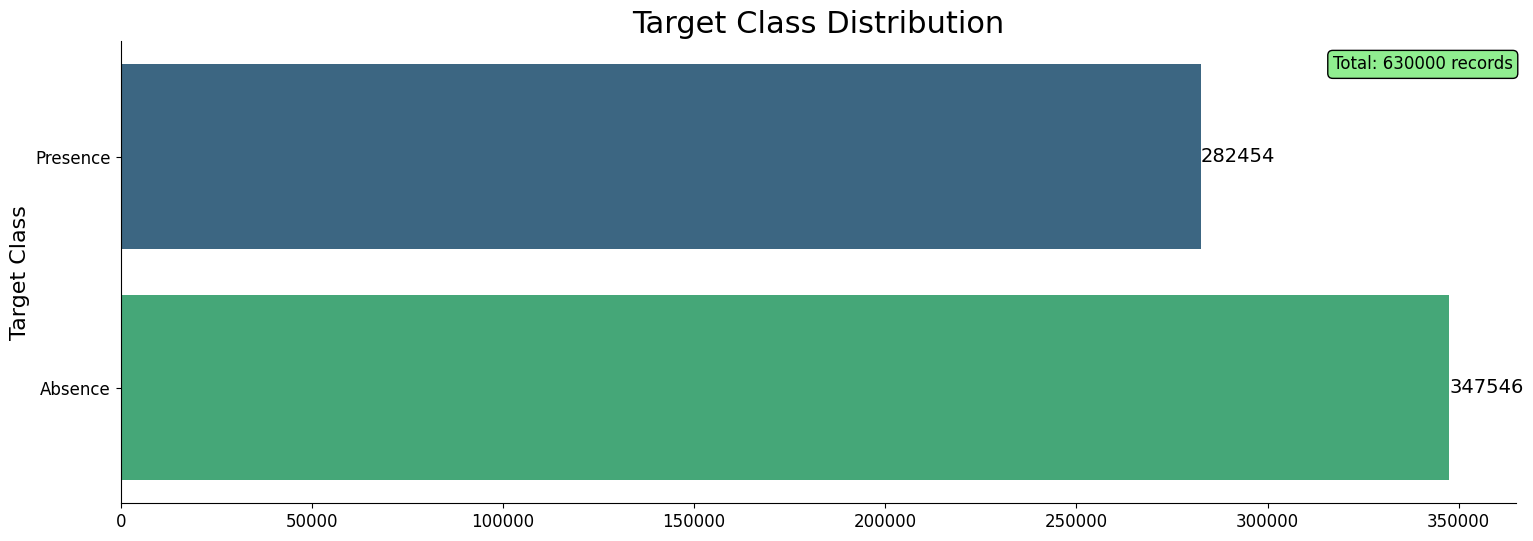

In [5]:
fig = plt.figure(figsize=(18, 6))
plt.title('Target Class Distribution', fontsize=22);

status_distribution = df_train['Heart Disease'].value_counts().sort_values()

bar_plot = sns.barplot(
    x=status_distribution.values,
    y=status_distribution.index.astype(str),
    palette="viridis",
    orient="h"
);

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', fontsize=14);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.ylabel('Target Class', fontsize=16);

text_params = {
    'x'       : status_distribution.max() * 0.98,
    'y'       : -0.4,
    's'       : f"Total: {len(df_train)} records",
    'size'    : 12,
    'color'   : "black",
    'ha'      : "center",
    'va'      : "center",
    'bbox'    : dict(boxstyle="round", fc=("lightgreen"),ec=("black"))
}
plt.text(**text_params);
plt.grid(False);
sns.despine();


## 2.3 Numerical/Categorical Feature Identification

In [6]:
excluded_features = ['id', 'loan_paid_back']

print("\n--- Feature Classification Based on df_train ---")


numerical_features = [
    col for col in df_train.select_dtypes(include=np.number).columns
    if col not in excluded_features
]


categorical_features = [
    col for col in df_train.select_dtypes(exclude=np.number).columns
    if col not in excluded_features
]


print("Numerical Features:")
print(f"  Total Count: {len(numerical_features)}")
print(f"  List: {numerical_features}\n")

print("Categorical Features:")
print(f"  Total Count: {len(categorical_features)}")
print(f"  List: {categorical_features}\n")

print("Excluded Features (ID and Target Variable):")
print(f"  List: {excluded_features}\n")


--- Feature Classification Based on df_train ---
Numerical Features:
  Total Count: 13
  List: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

Categorical Features:
  Total Count: 1
  List: ['Heart Disease']

Excluded Features (ID and Target Variable):
  List: ['id', 'loan_paid_back']




## 2.4 Correlation Heatmap

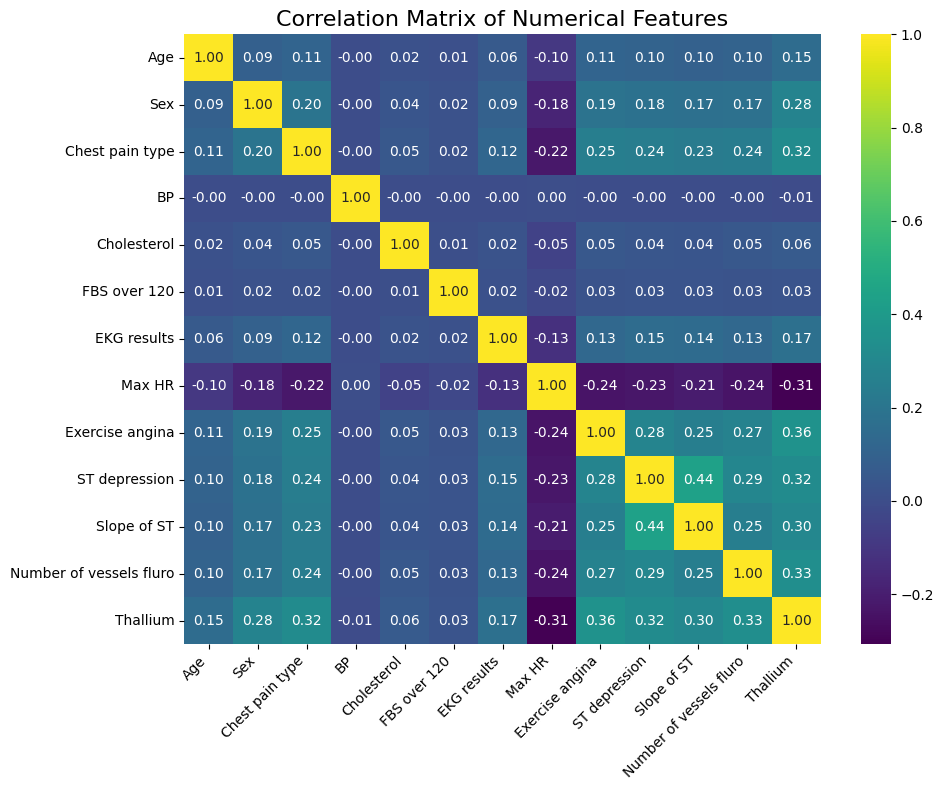

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 2.5 Numerical Feature Distributions (Train vs Test)


📌 Age Summary Statistics:


,Train,Test
Mean,54.136706,54.159870
Median,54.000000,54.000000
Std,8.256301,8.255471


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


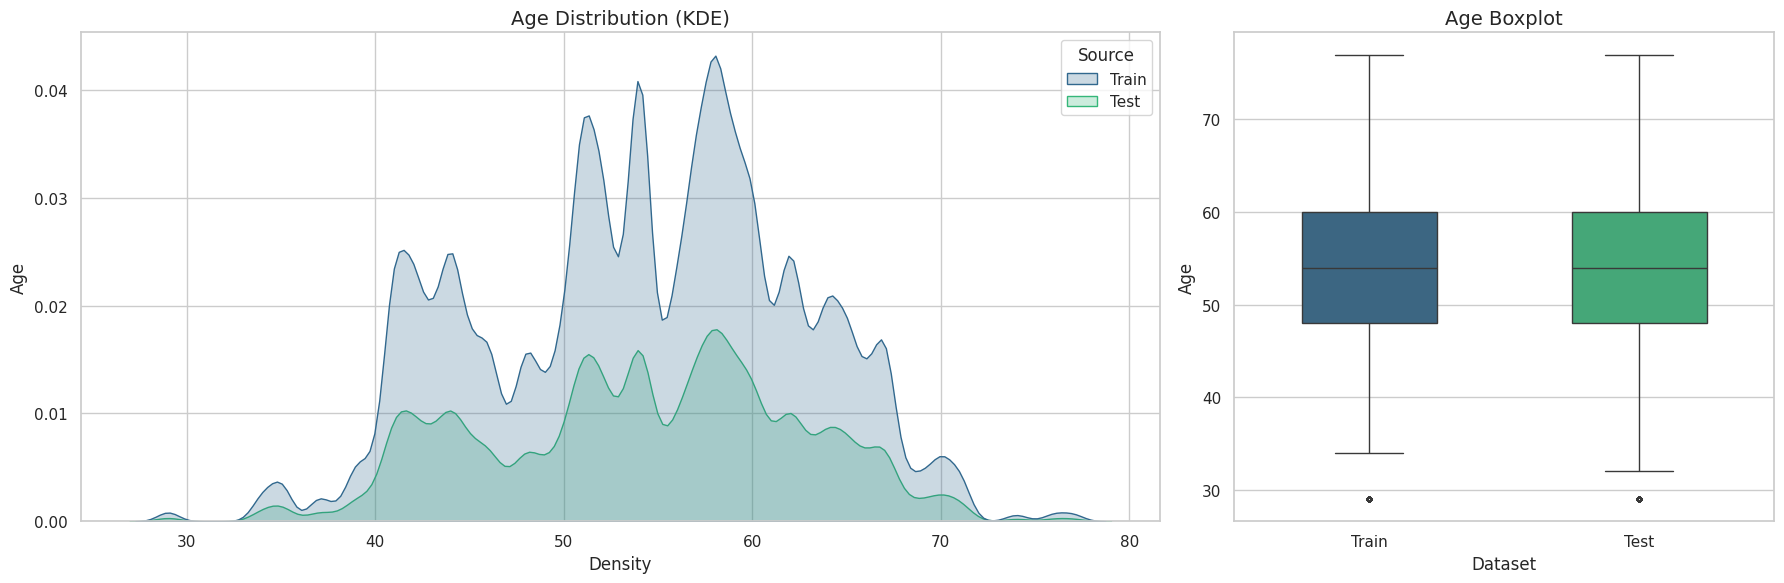


📌 Sex Summary Statistics:


,Train,Test
Mean,0.714735,0.716315
Median,1.000000,1.000000
Std,0.451541,0.450787


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


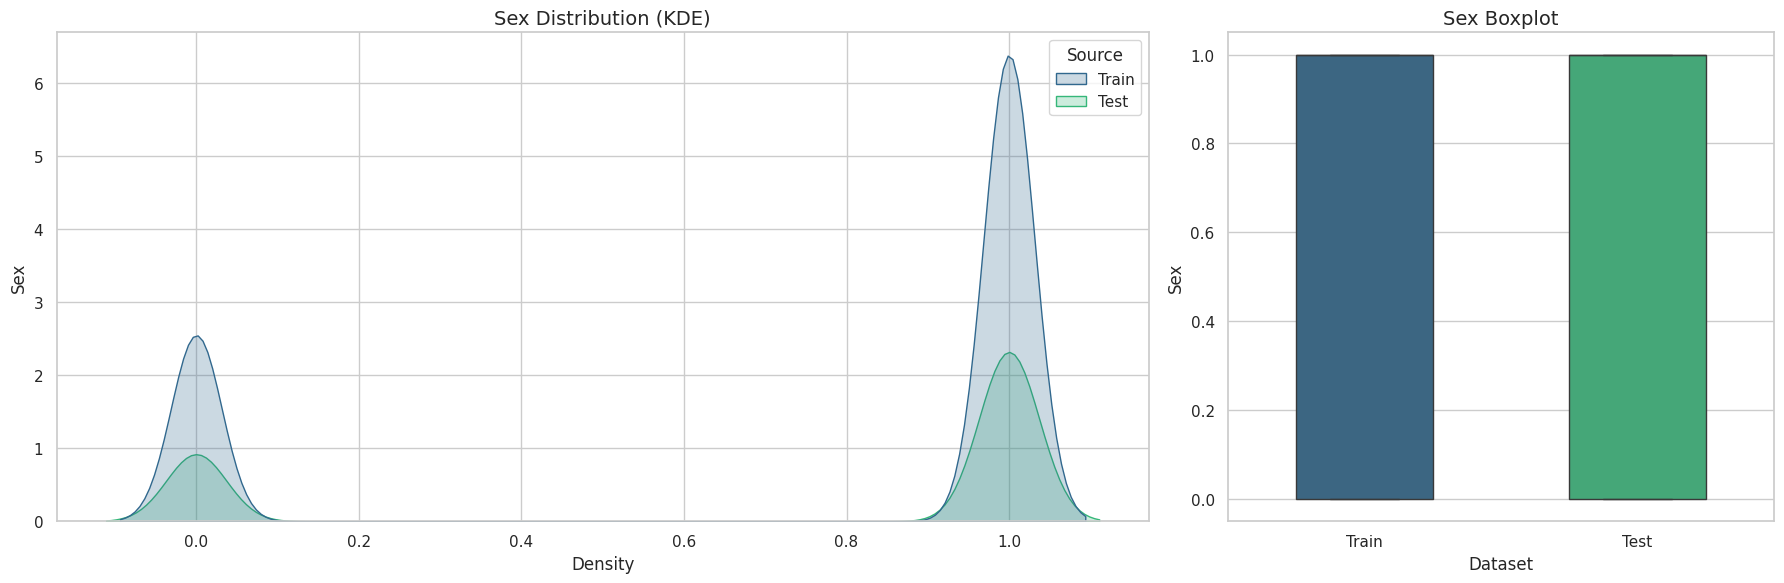


📌 Chest pain type Summary Statistics:


,Train,Test
Mean,3.312752,3.315107
Median,4.000000,4.000000
Std,0.851615,0.851762


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


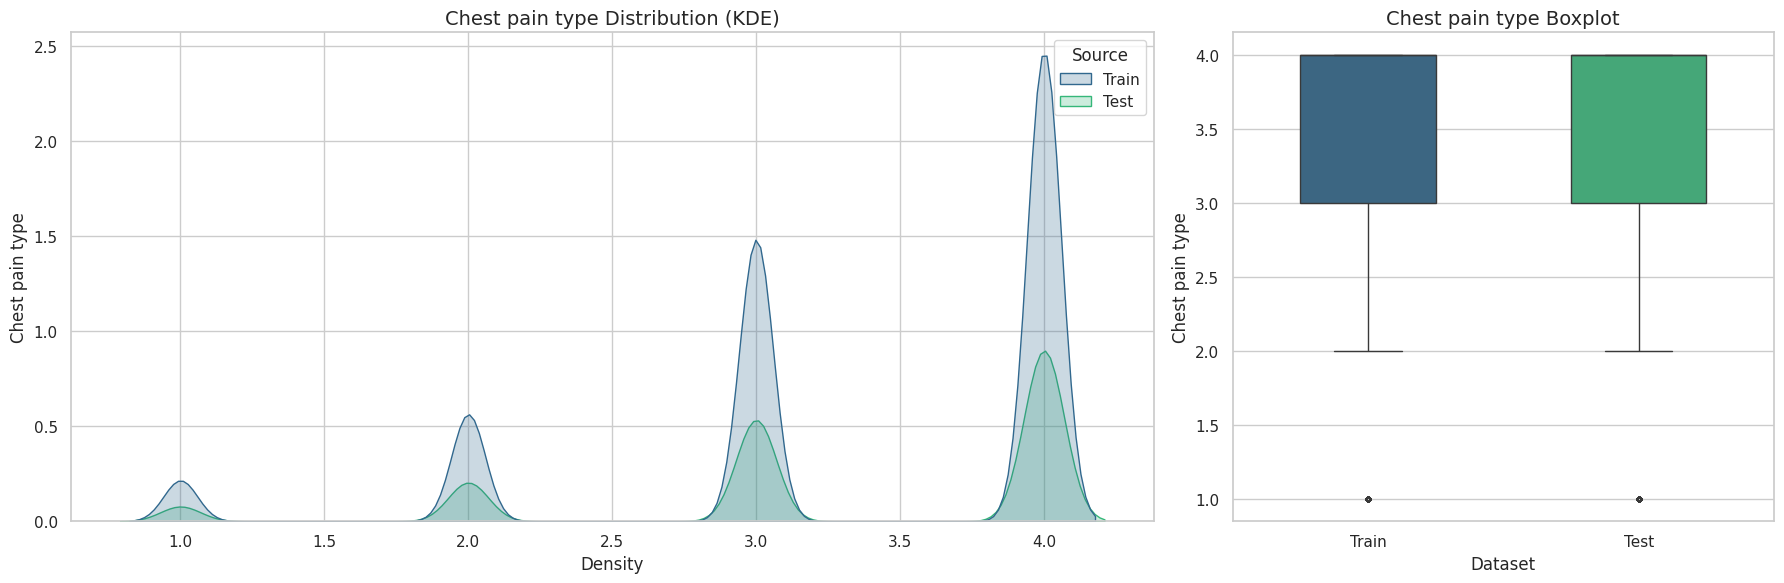


📌 BP Summary Statistics:


,Train,Test
Mean,130.497433,130.555089
Median,130.000000,130.000000
Std,14.975802,15.007908


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


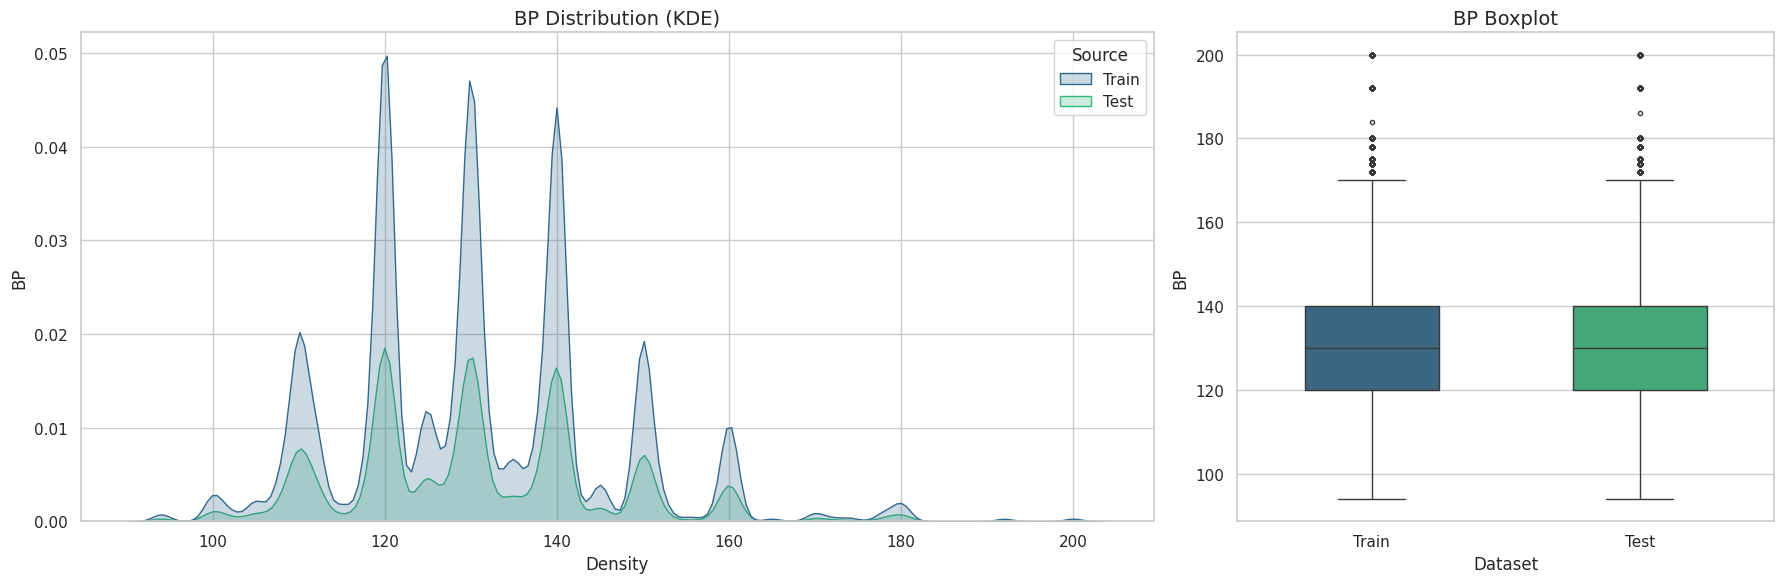


📌 Cholesterol Summary Statistics:


,Train,Test
Mean,245.011814,245.045270
Median,243.000000,243.000000
Std,33.681581,33.695458


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


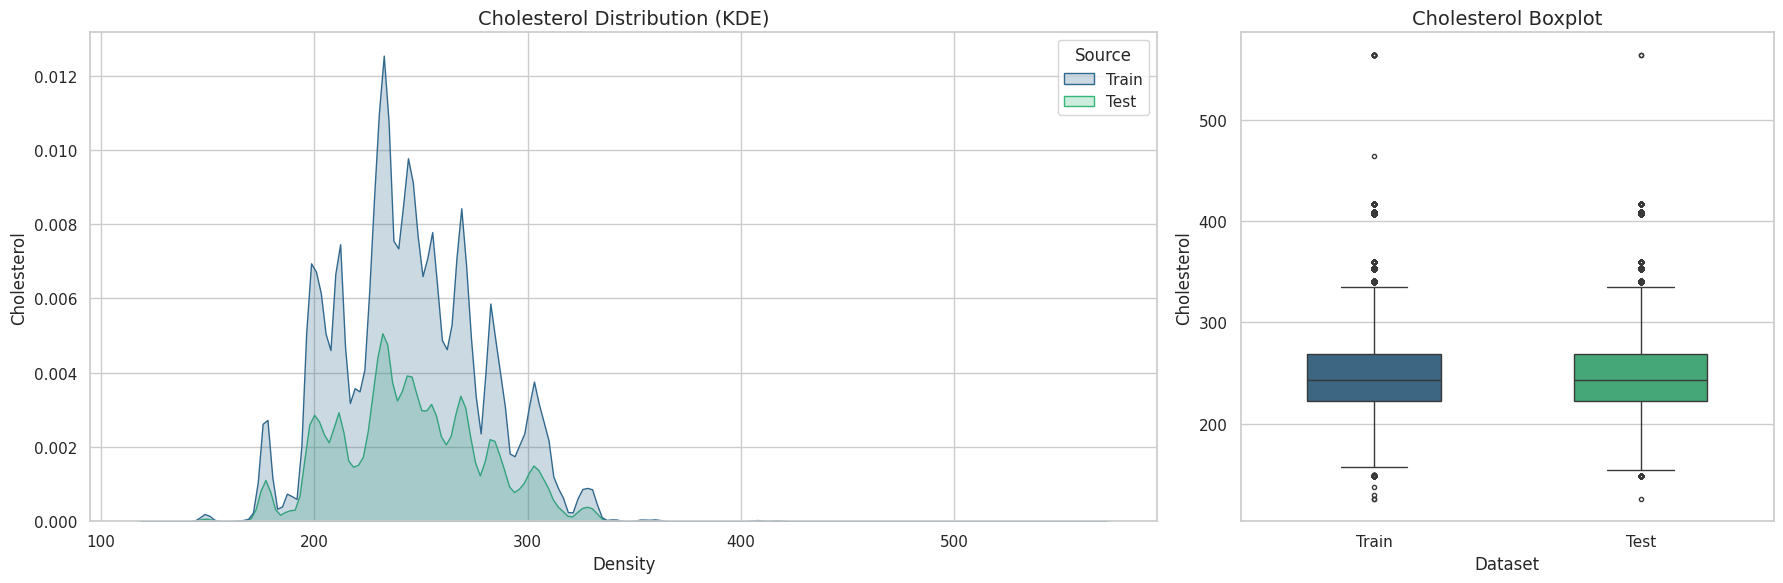


📌 FBS over 120 Summary Statistics:


,Train,Test
Mean,0.079987,0.080052
Median,0.000000,0.000000
Std,0.271274,0.271374


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


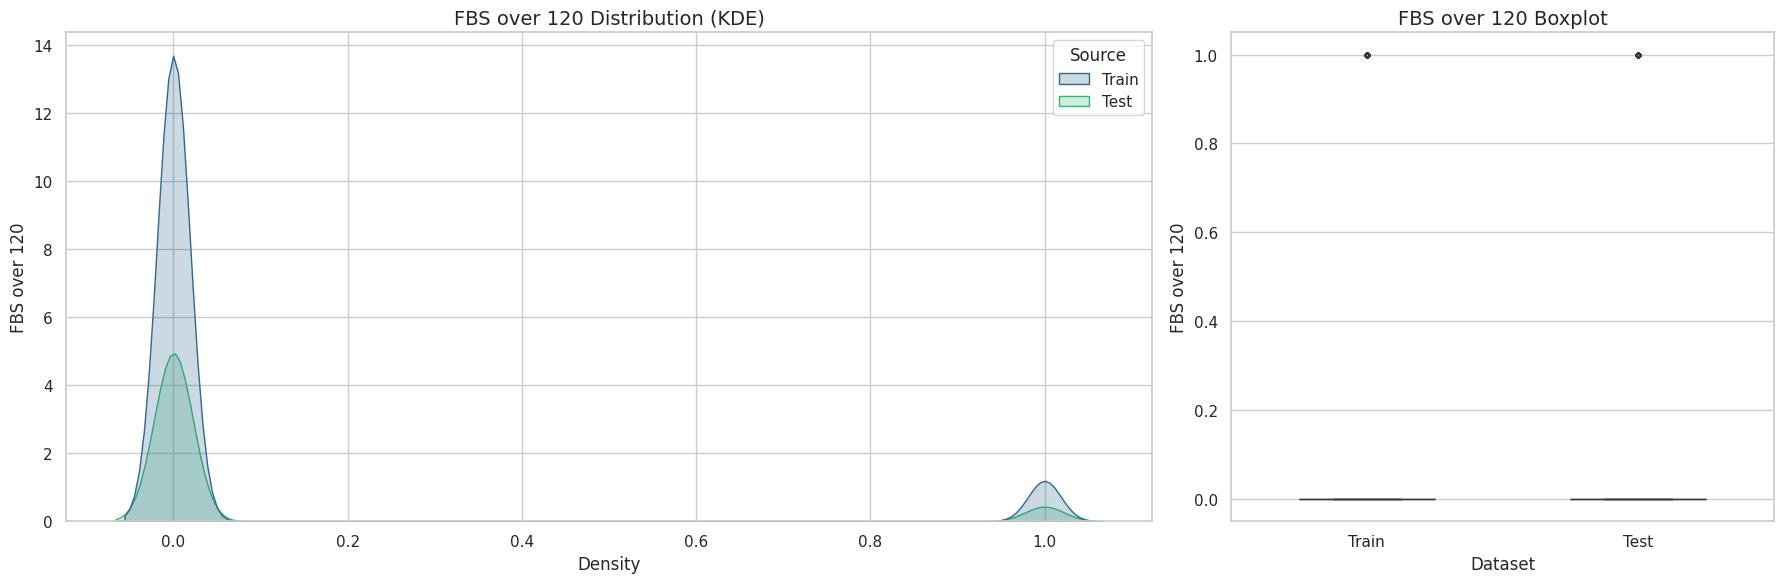


📌 EKG results Summary Statistics:


,Train,Test
Mean,0.981660,0.978493
Median,0.000000,0.000000
Std,0.998783,0.998686


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


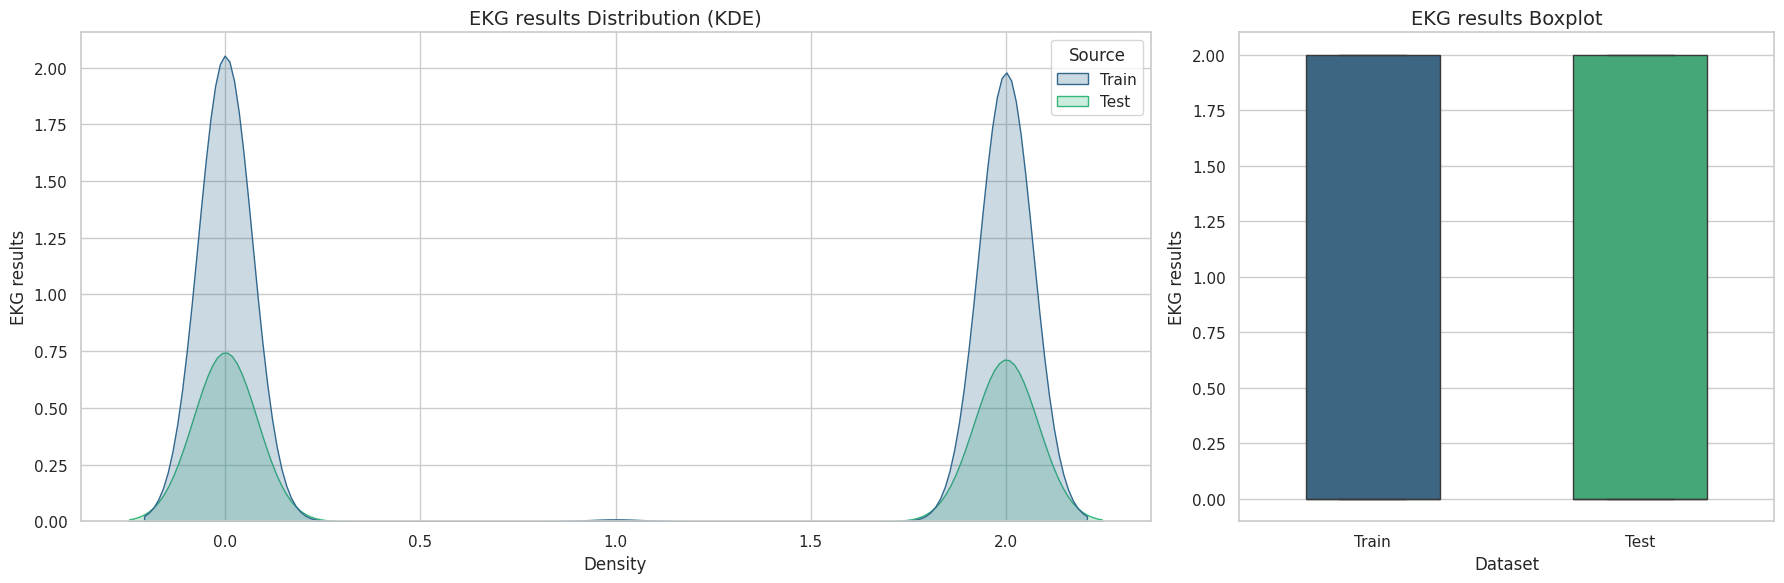


📌 Max HR Summary Statistics:


,Train,Test
Mean,152.816763,152.783756
Median,157.000000,157.000000
Std,19.112927,19.153454


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


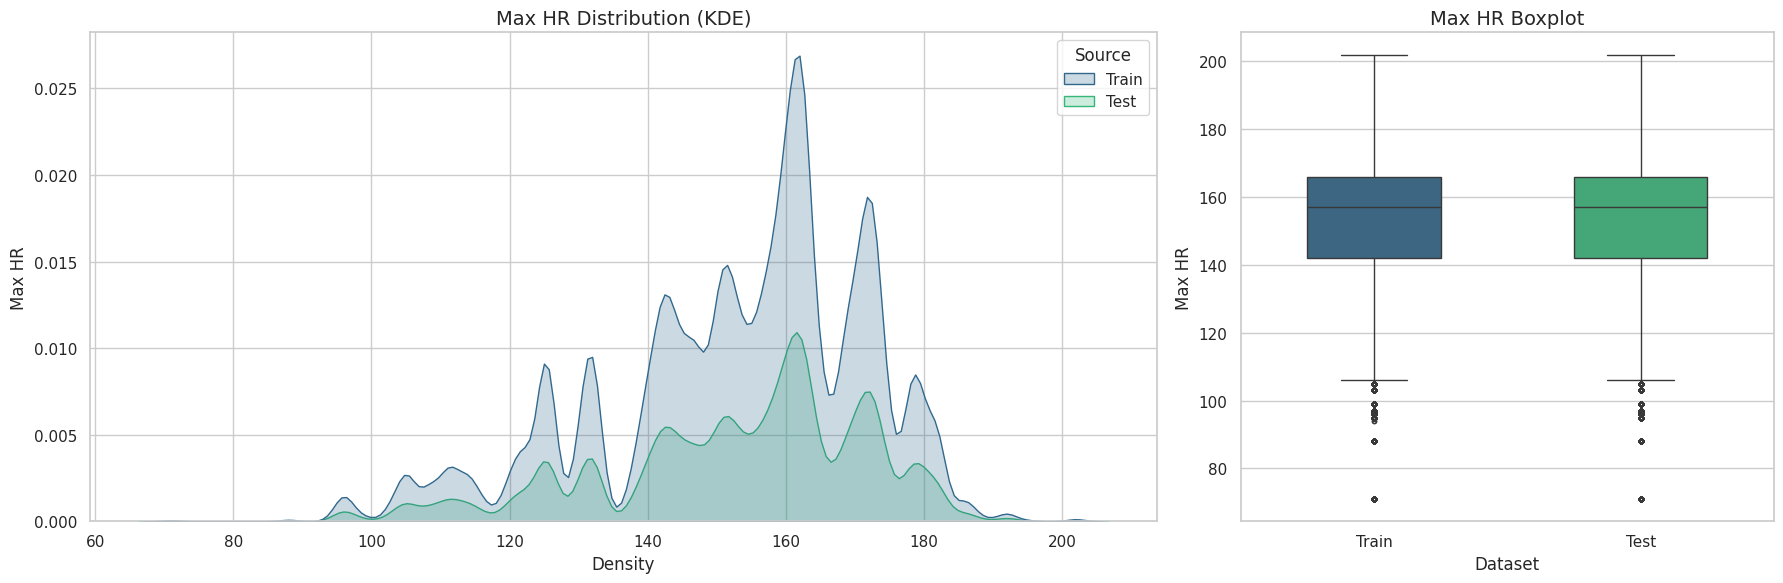


📌 Exercise angina Summary Statistics:


,Train,Test
Mean,0.273725,0.274656
Median,0.000000,0.000000
Std,0.445870,0.446341


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


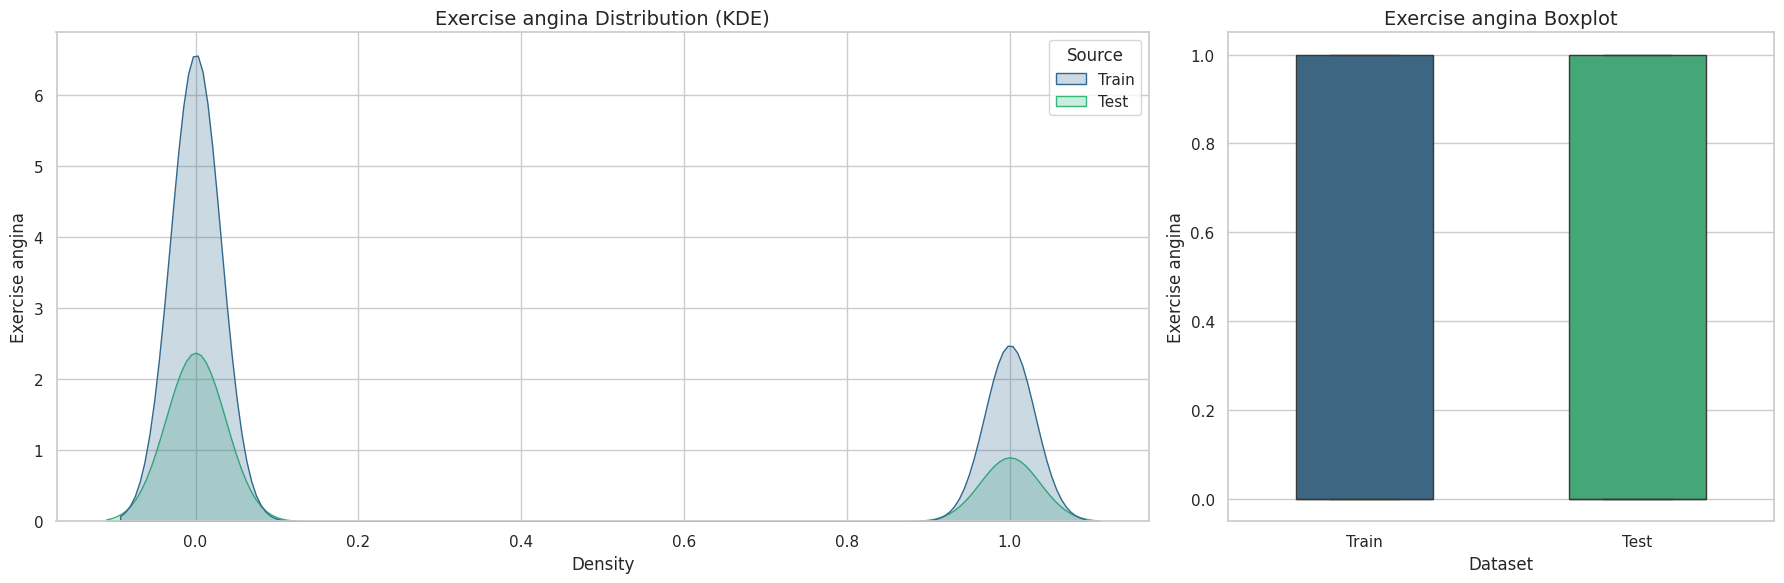


📌 ST depression Summary Statistics:


,Train,Test
Mean,0.716028,0.718082
Median,0.100000,0.100000
Std,0.948472,0.947417


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


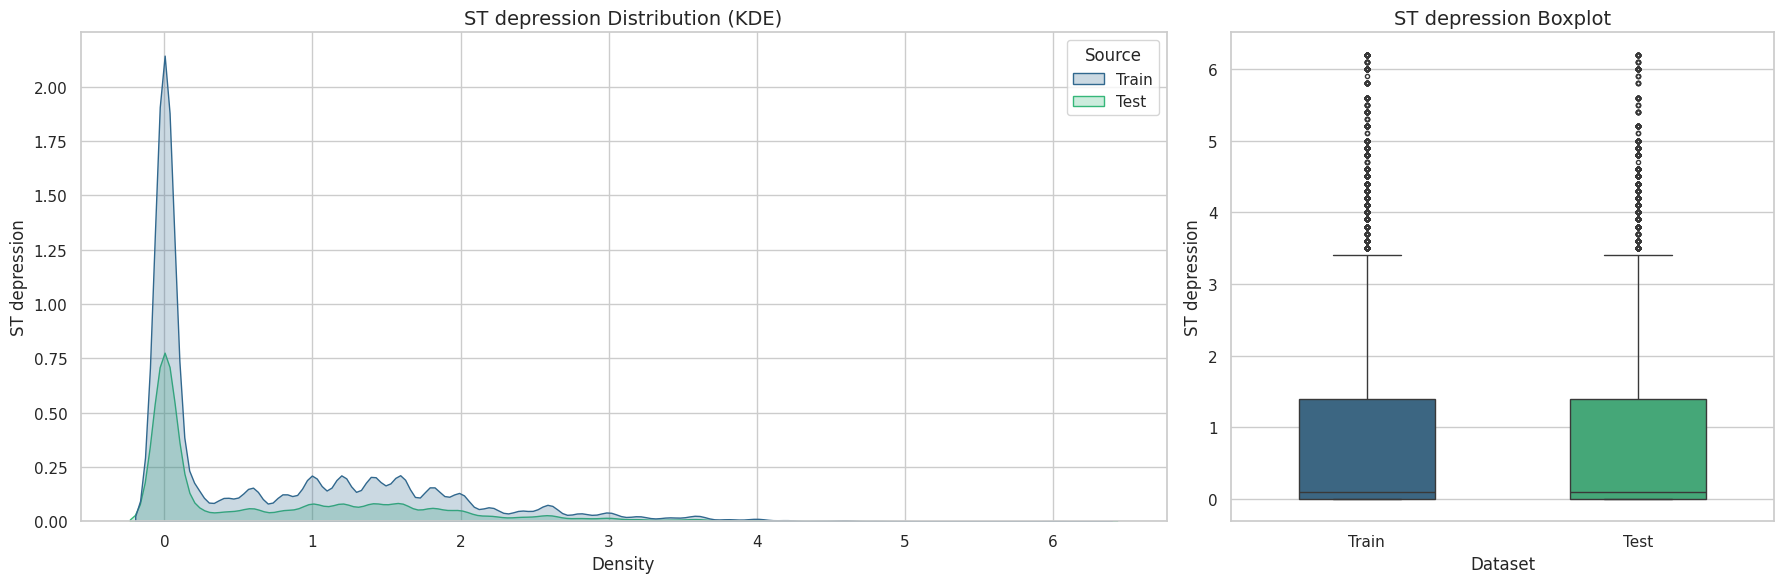


📌 Slope of ST Summary Statistics:


,Train,Test
Mean,1.455871,1.459356
Median,1.000000,1.000000
Std,0.545192,0.546186


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


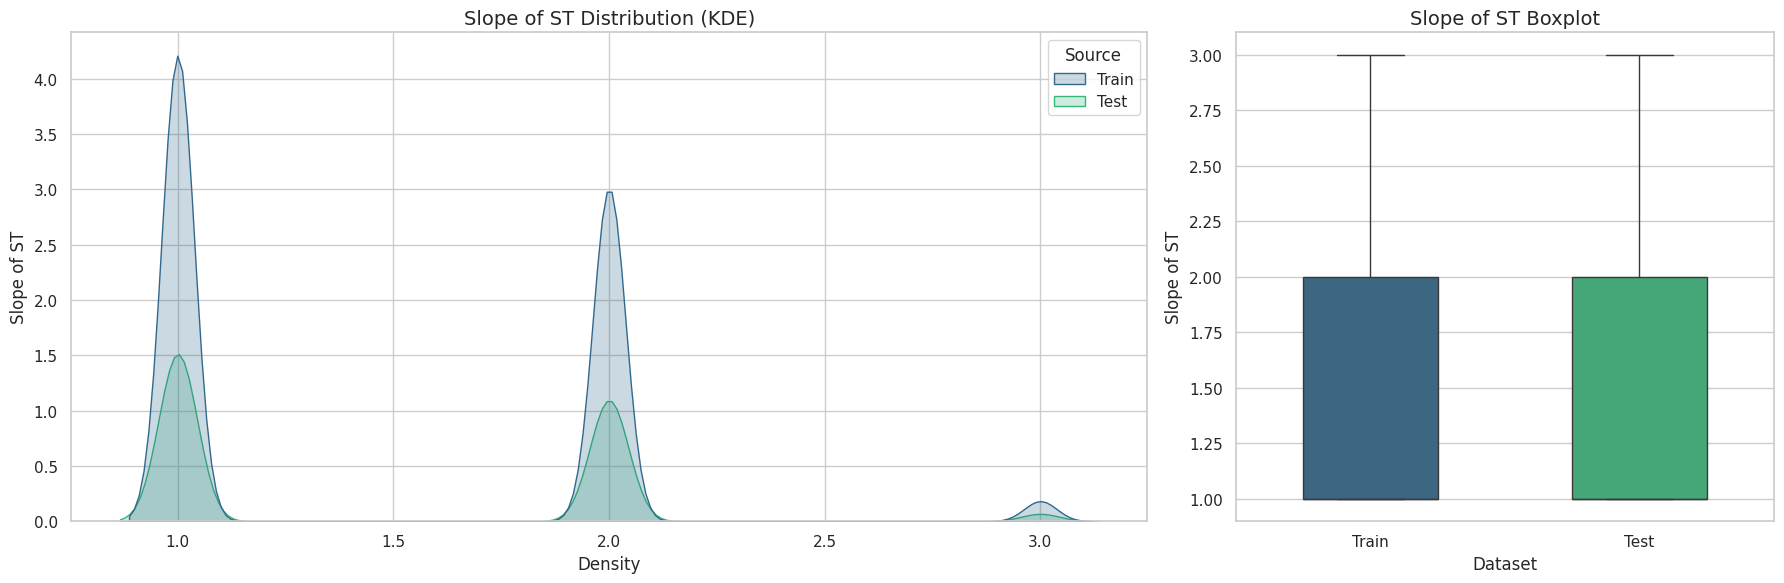


📌 Number of vessels fluro Summary Statistics:


,Train,Test
Mean,0.451040,0.45480
Median,0.000000,0.00000
Std,0.798549,0.80127


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


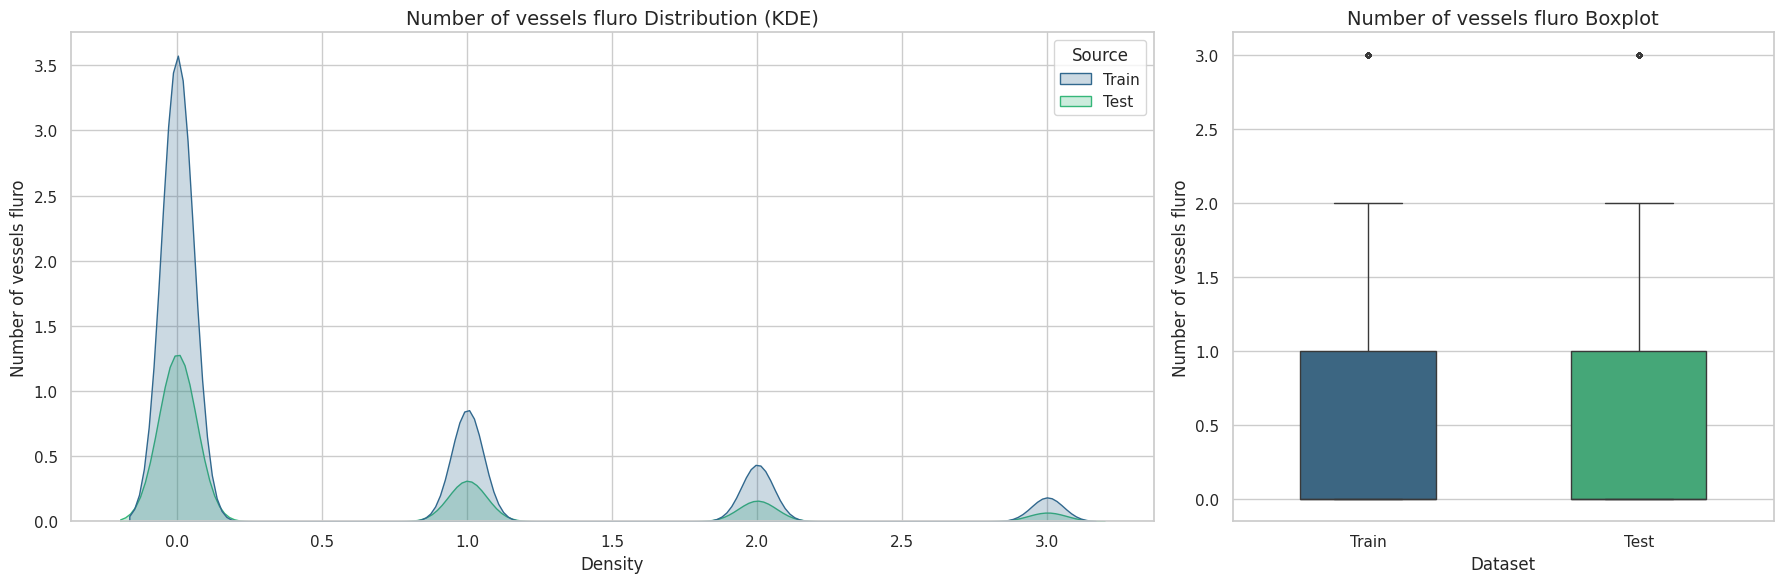


📌 Thallium Summary Statistics:


,Train,Test
Mean,4.618873,4.619774
Median,3.000000,3.000000
Std,1.950007,1.950273


/tmp/ipykernel_17/2211478203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


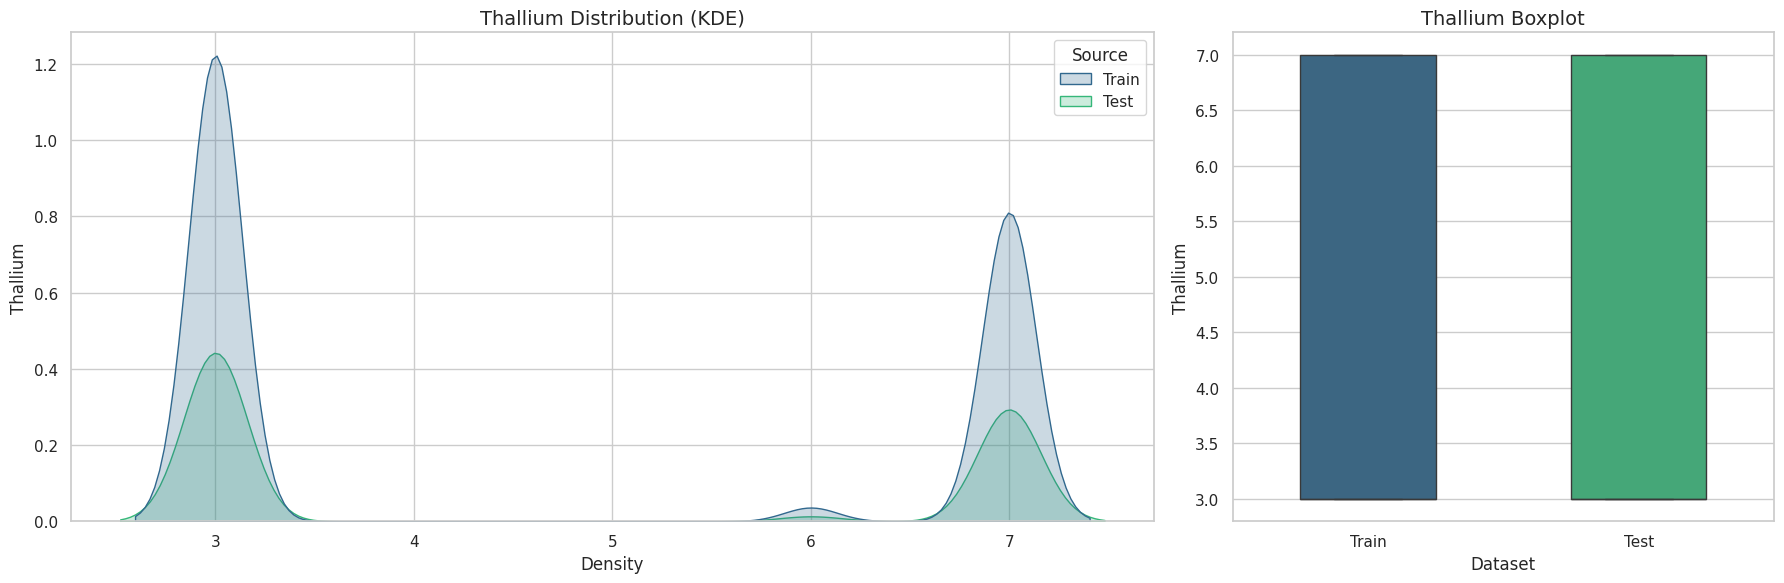

In [8]:
def plot_numerical_distributions(train_df, test_df, numerical_cols):
    
    sns.set_style("whitegrid")
    sns.set_context("notebook")

    combined_df = pd.concat([
        train_df[numerical_cols].assign(Source='Train'),
        test_df[numerical_cols].assign(Source='Test')
    ], axis=0, ignore_index=True)

    palette = ['#1f77b4', '#ff7f0e']  

    for col in numerical_cols:
        print(f"\n📌 {col} Summary Statistics:")
        display(pd.DataFrame({
            'Train': [train_df[col].mean(), train_df[col].median(), train_df[col].std()],
            'Test': [test_df[col].mean(), test_df[col].median(), test_df[col].std()]
        }, index=['Mean', 'Median', 'Std']))

        fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})

        sns.kdeplot(
            data=combined_df, x=col, hue='Source', ax=axes[0], fill=True, palette="viridis"
        )
        axes[0].set_title(f'{col} Distribution (KDE)', fontsize=14)
        axes[0].set_xlabel('Density')
        axes[0].set_ylabel(col)

        sns.boxplot(
            data=combined_df, y=col, x='Source', ax=axes[1],
            orient='v', width=0.5, linewidth=1, fliersize=3, palette="viridis"
        )
        axes[1].set_title(f'{col} Boxplot', fontsize=14)
        axes[1].set_xlabel('Dataset')
        axes[1].set_ylabel(col)

        plt.tight_layout()
        plt.show()

# Call numerical distribution function
plot_numerical_distributions(df_train, df_test, numerical_features)


## 2.6 Categorical Feature Distributions (Train vs Test)

In [9]:
def plot_categorical_distributions(train_df, test_df, categorical_cols, target='Heart Disease'):

    if len(categorical_cols) == 0:
        print("No categorical features to plot.")
        return

    palette = ['#1f77b4', '#ff7f0e']  
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
    axes = axes.flatten()  

    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        combined = pd.concat([
            train_df[[col]].assign(Source='Train'),
            test_df[[col]].assign(Source='Test')
        ], axis=0, ignore_index=True)

        sns.countplot(x=col, hue='Source', data=combined, palette="viridis", ax=ax)
        ax.set_title(f'Distribution of {col} (Train vs Test)', fontsize=12)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.legend(title='Dataset')
        ax.tick_params(axis='x', rotation=45)

        target_means = train_df.groupby(col)[target].mean().sort_values(ascending=False)
        ax2 = ax.twinx()
        sns.pointplot(x=target_means.index, y=target_means.values, ax=ax2, color='red', markers='o', linestyles='--')
        ax2.set_ylabel(f'Mean {target}', color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


features_for_comparison = [col for col in categorical_features if col != 'Heart Disease']
plot_categorical_distributions(df_train, df_test, features_for_comparison, target='Heart Disease')

No categorical features to plot.



## 2.7 Numerical Distribution by Target


📌 Age Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,52.558093,52.0,8.304120
1.0,56.079114,57.0,7.768723


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


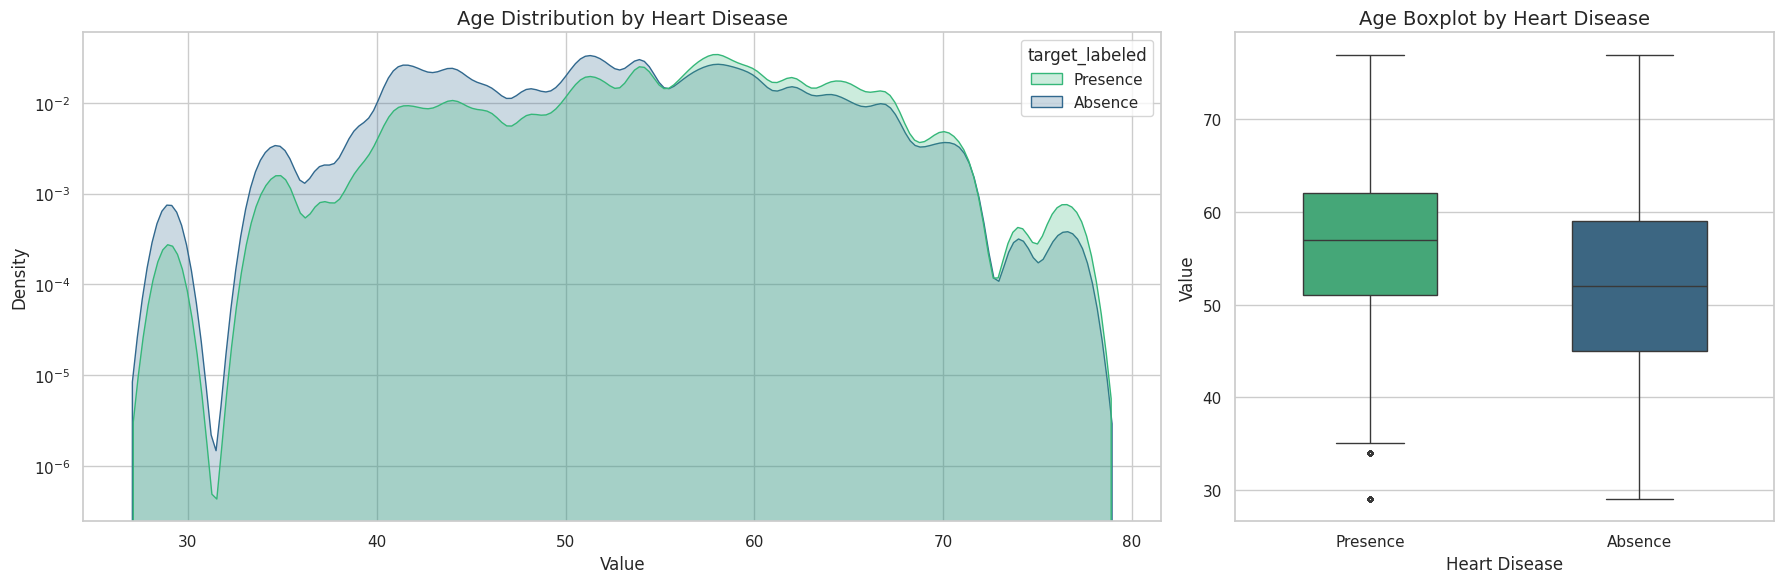


📌 Sex Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,0.575337,1.0,0.494292
1.0,0.886258,1.0,0.317499


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


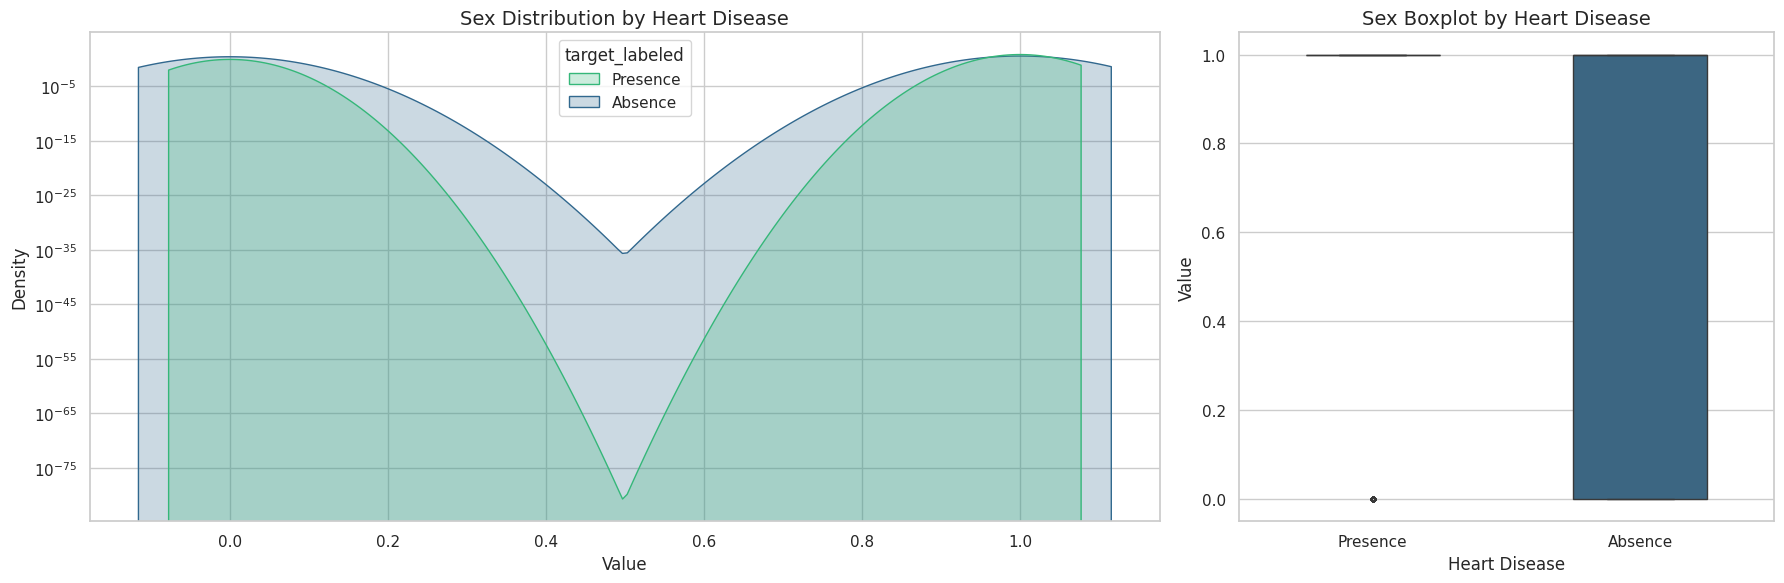


📌 Chest pain type Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,2.959070,3.0,0.871282
1.0,3.747941,4.0,0.583307


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


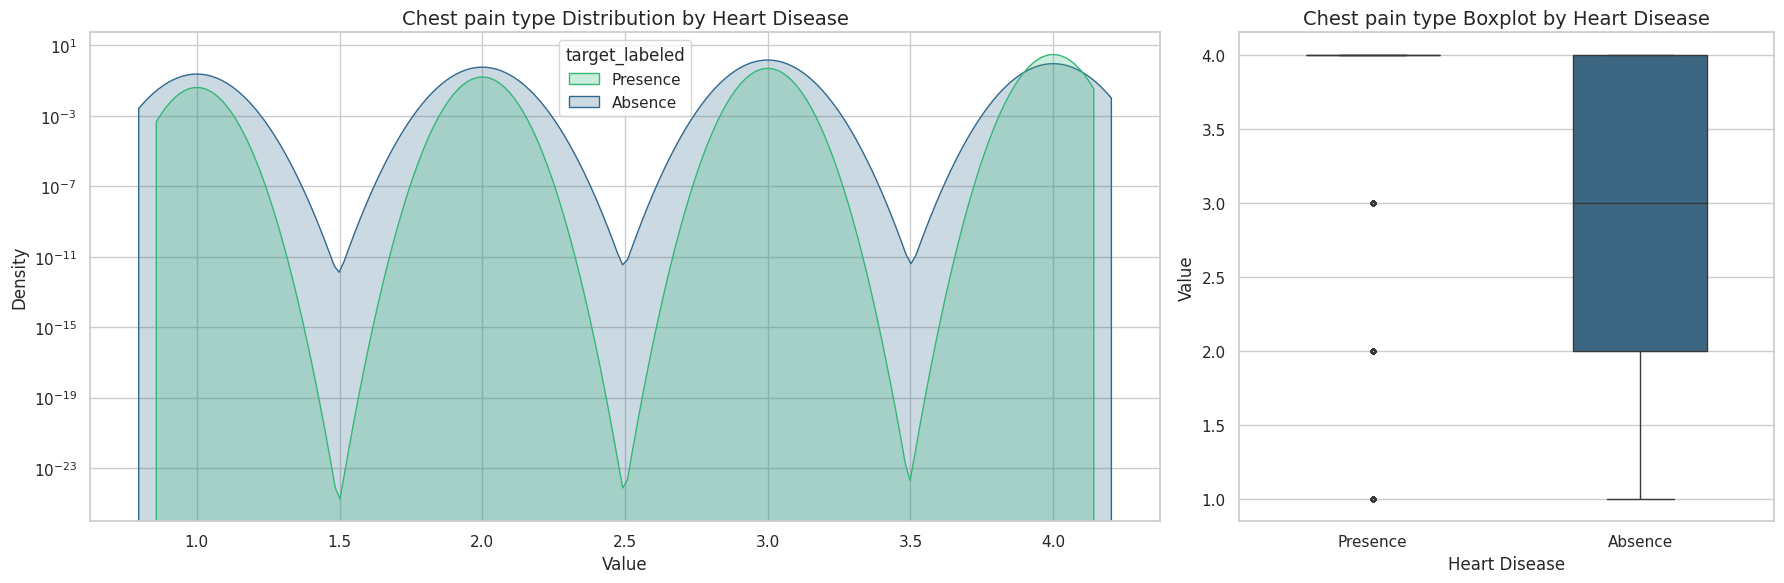


📌 BP Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,130.567381,130.0,15.135647
1.0,130.411366,130.0,14.776321


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


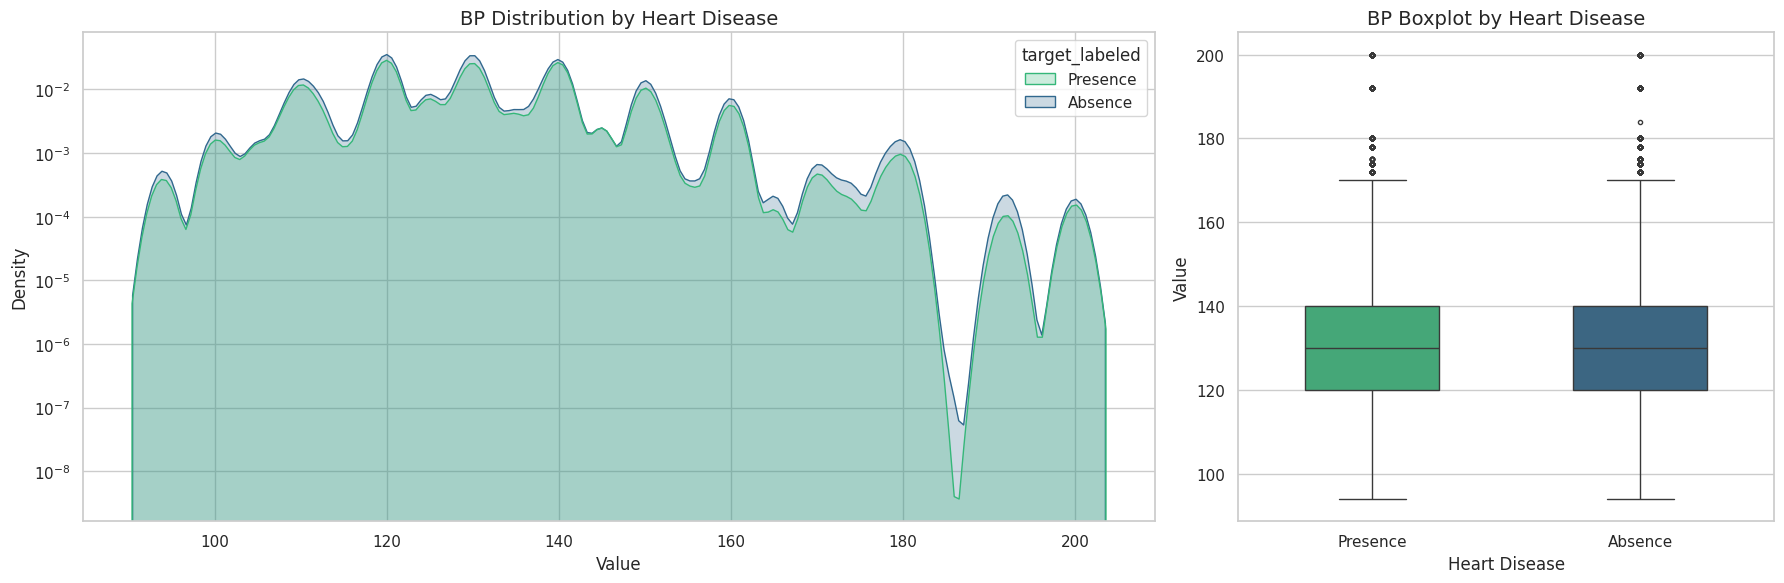


📌 Cholesterol Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,242.499102,239.0,34.080064
1.0,248.103585,246.0,32.922645


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


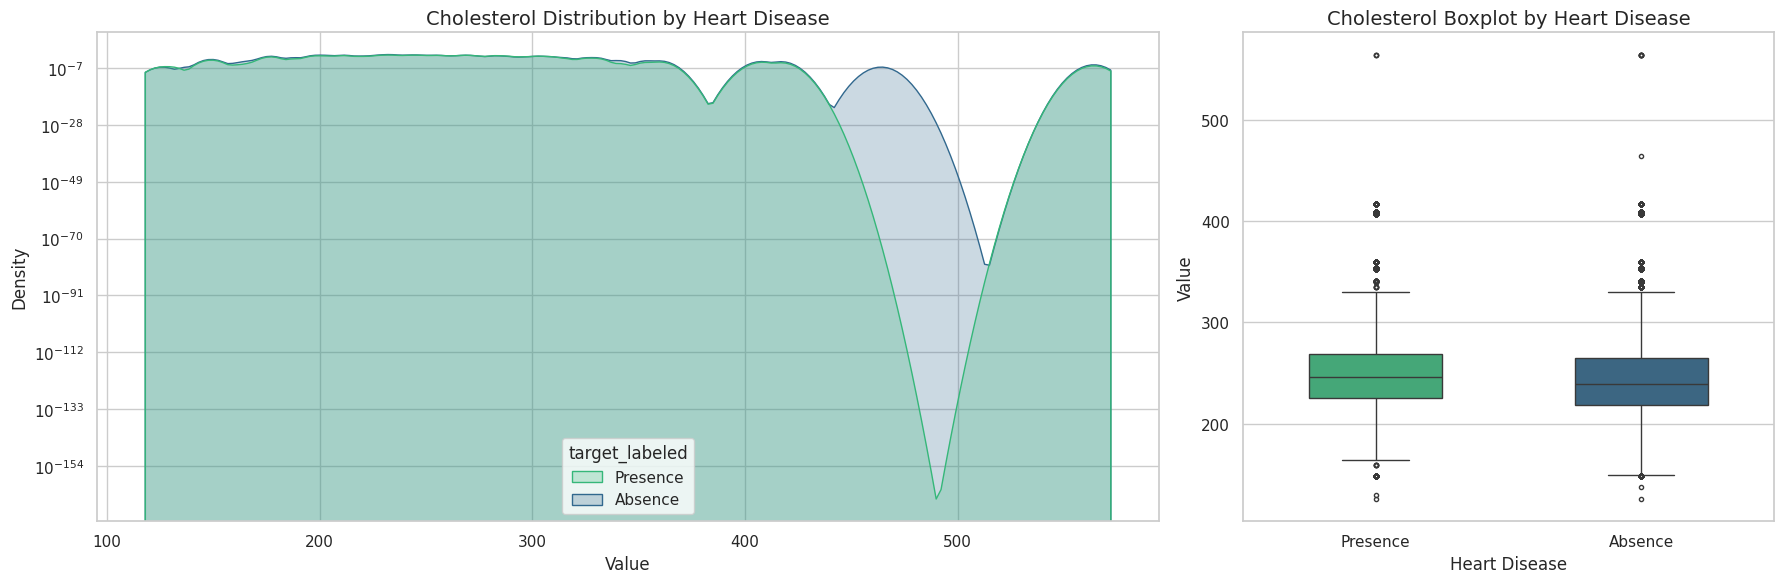


📌 FBS over 120 Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,0.071778,0.0,0.25812
1.0,0.090089,0.0,0.28631


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


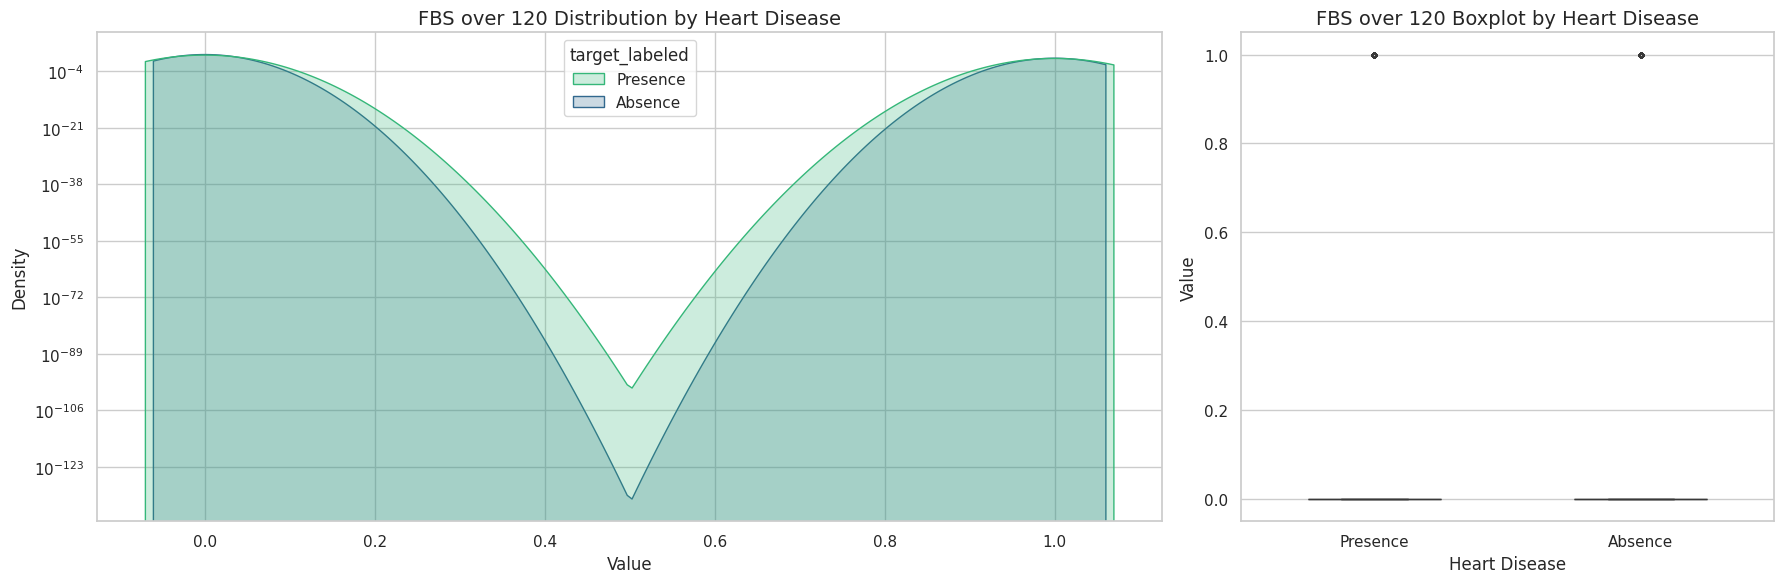


📌 EKG results Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,0.784506,0.0,0.975259
1.0,1.224249,2.0,0.973669


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


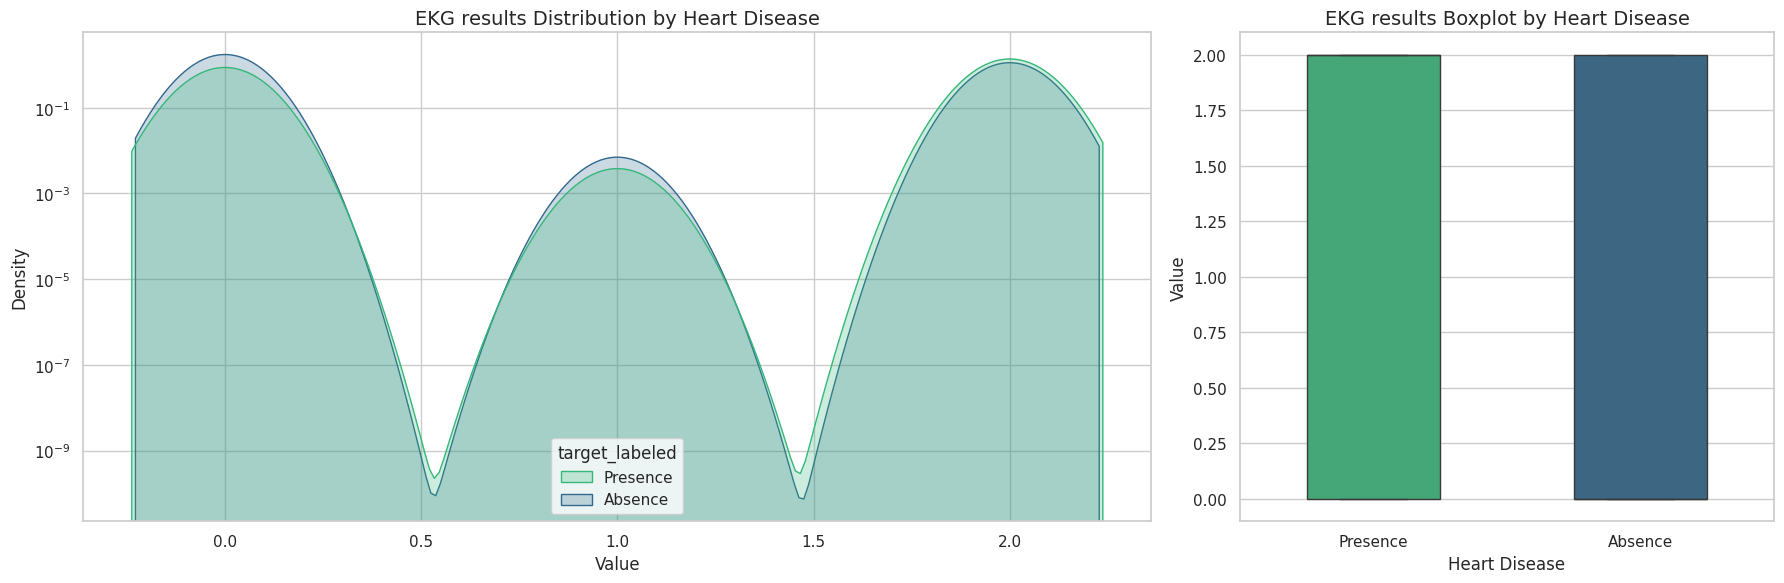


📌 Max HR Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,160.415105,162.0,14.740398
1.0,143.467372,146.0,19.722854


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


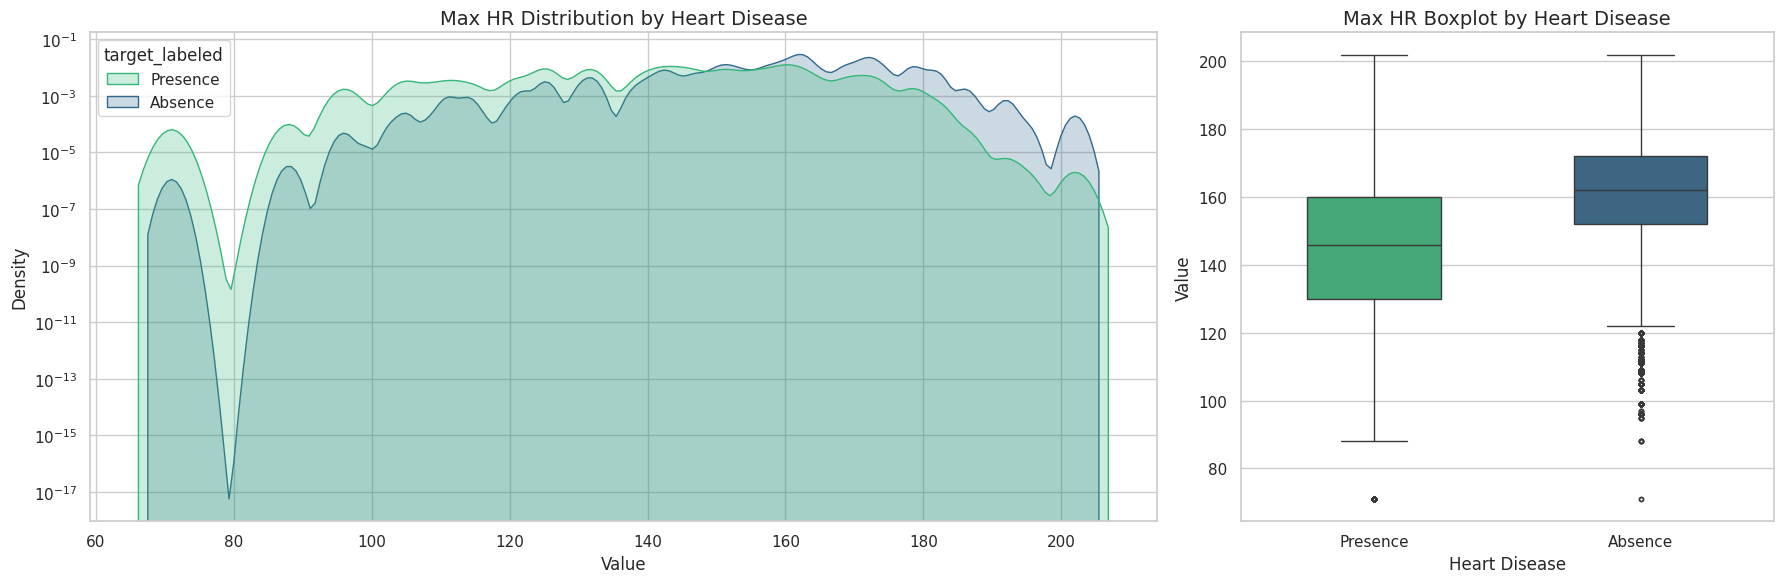


📌 Exercise angina Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,0.096117,0.0,0.294752
1.0,0.492264,0.0,0.499941


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


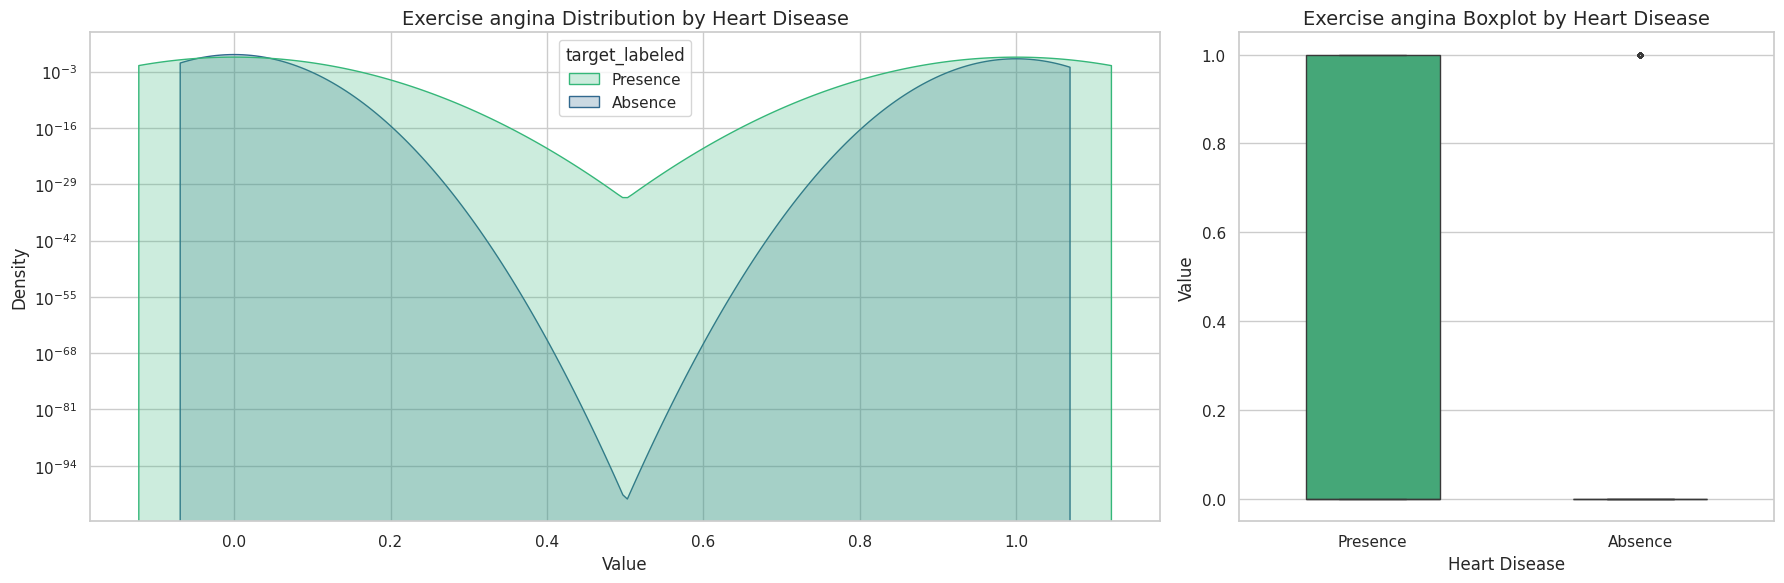


📌 ST depression Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,0.347808,0.0,0.634996
1.0,1.169104,1.2,1.066893


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


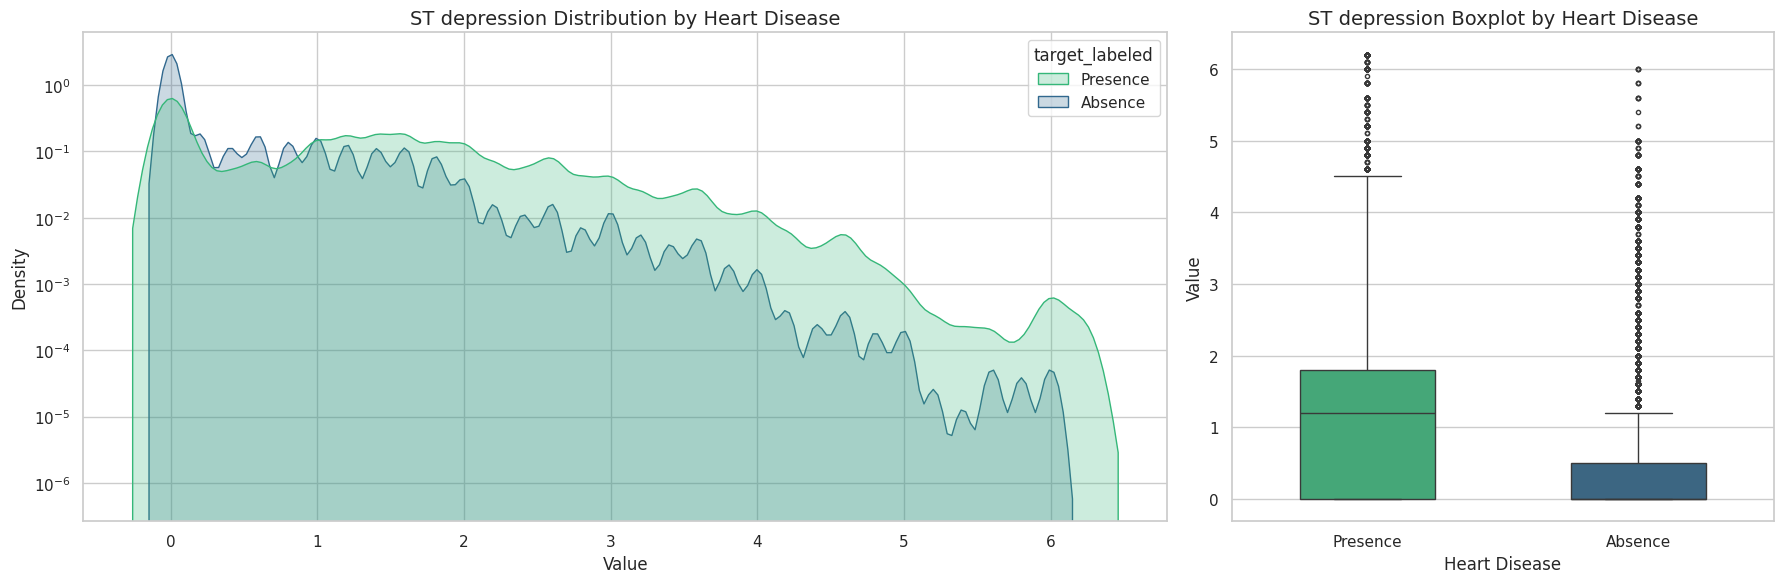


📌 Slope of ST Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,1.251877,1.0,0.461846
1.0,1.706876,2.0,0.535073


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


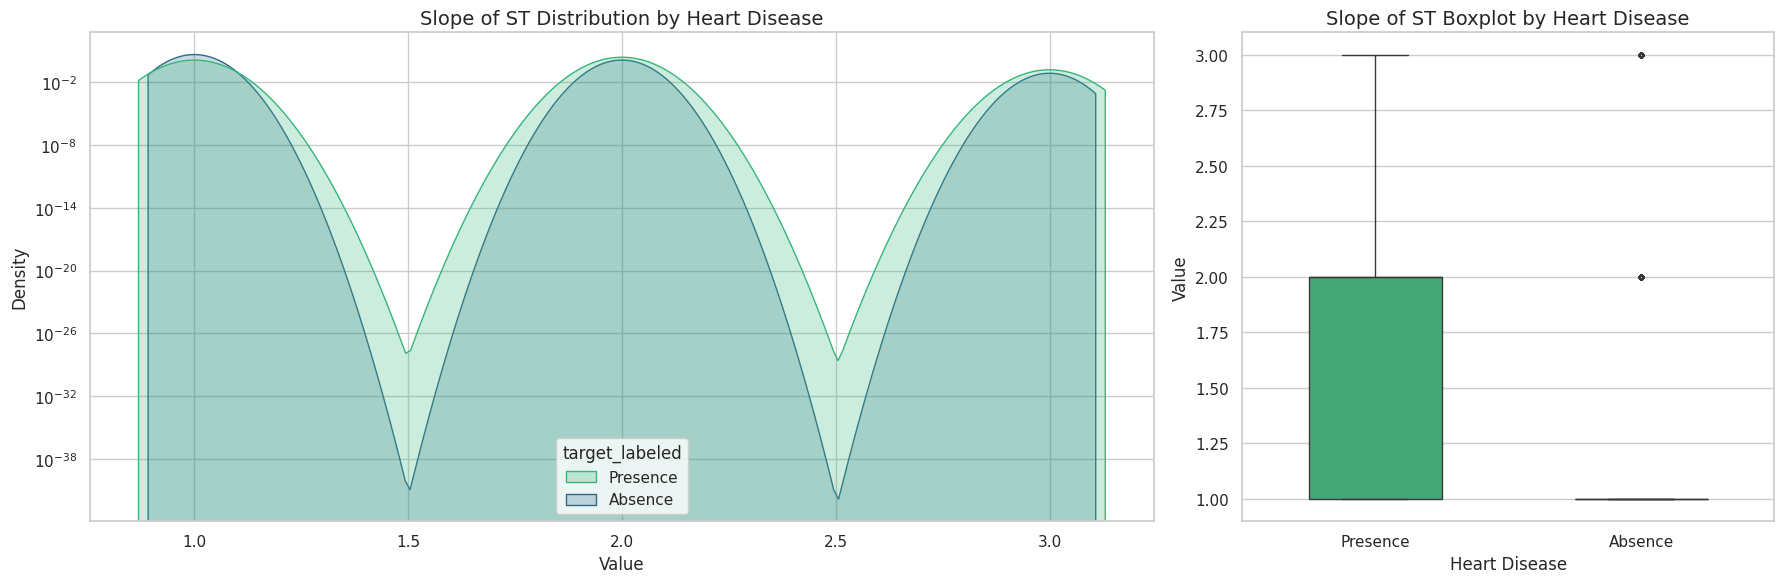


📌 Number of vessels fluro Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,0.135291,0.0,0.434498
1.0,0.839553,1.0,0.957291


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


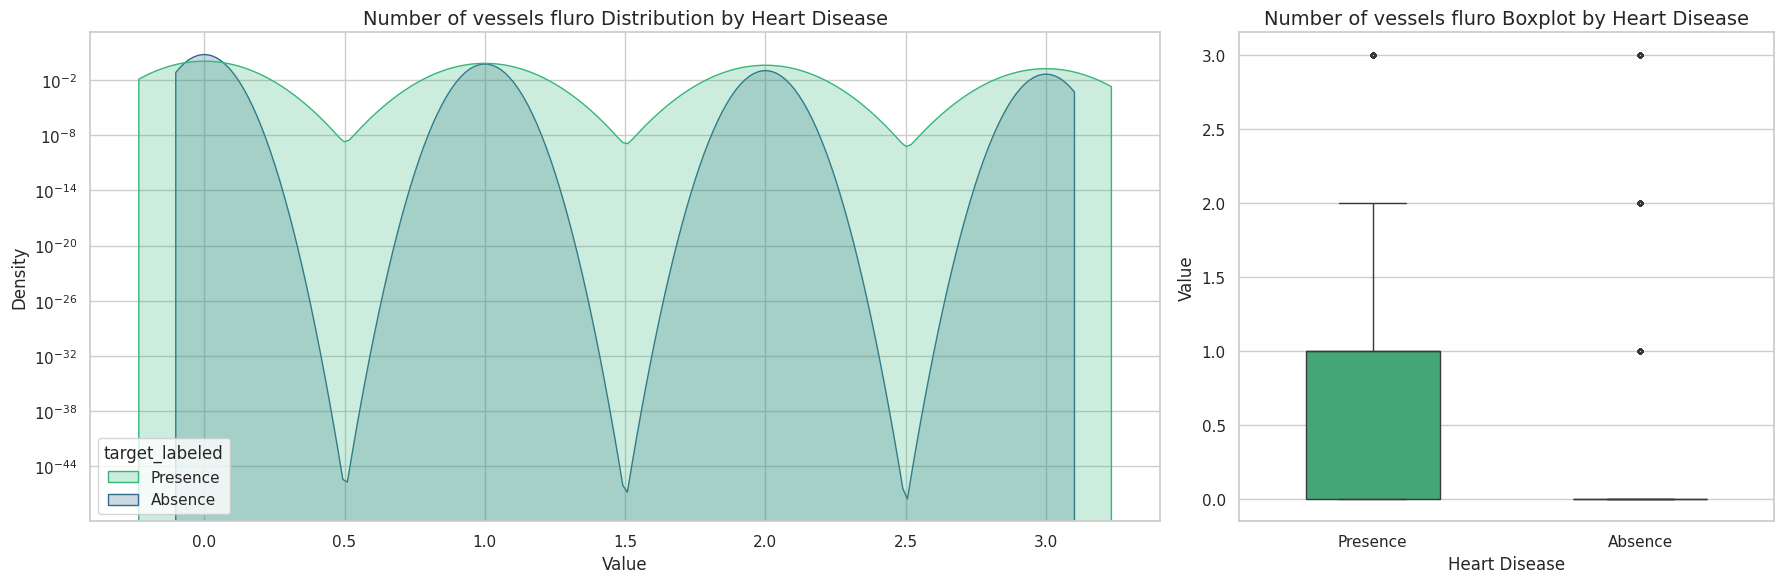


📌 Thallium Summary Statistics by Heart Disease:


,mean,median,std
target_numerical,,,
0.0,3.553955,3.0,1.370867
1.0,5.929203,7.0,1.748327


/tmp/ipykernel_17/1326707033.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


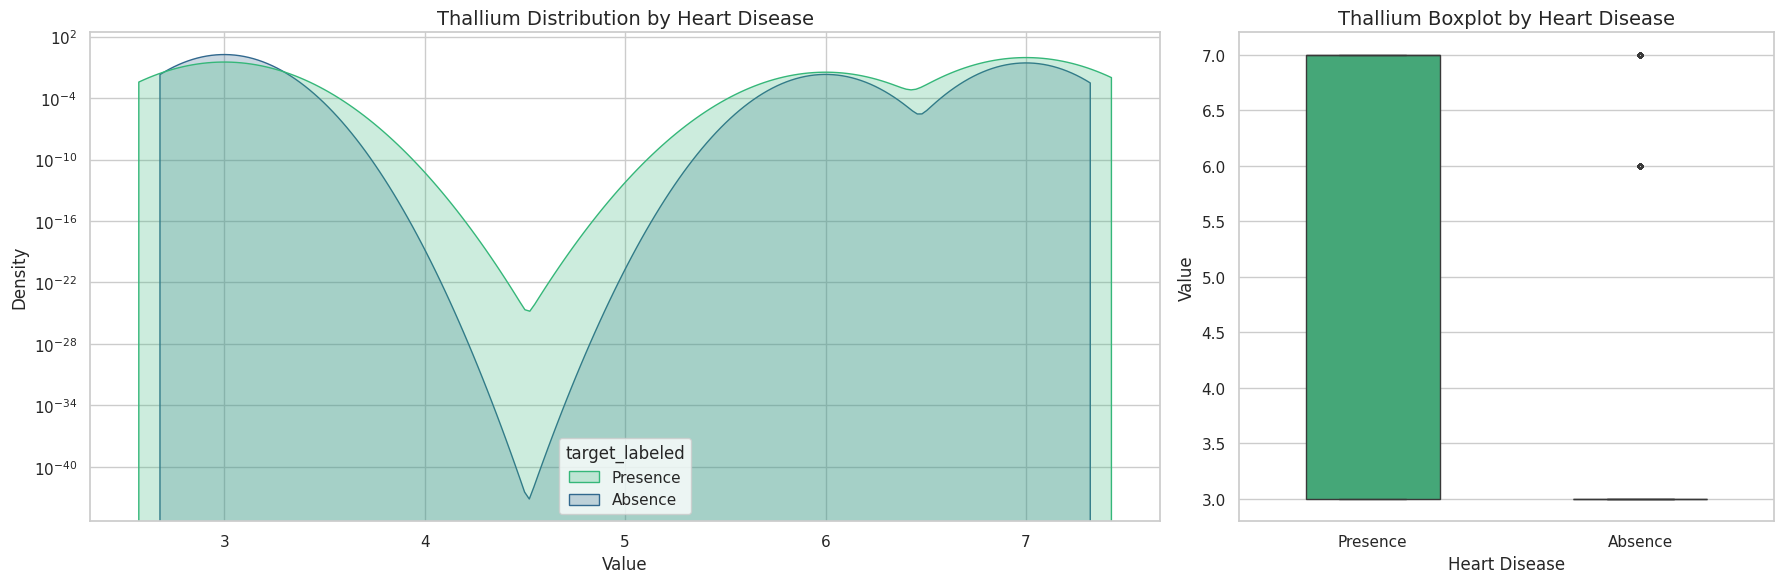

In [10]:
def plot_numerical_distributions(df, numerical_cols, target_col):
    
    sns.set_context("notebook")

    df_temp = df.copy()

    if df_temp[target_col].dtype == 'object':
        df_temp['target_numerical'] = df_temp[target_col].map({'Absence': 0, 'Presence': 1}).astype(float)
        df_temp['target_labeled'] = df_temp[target_col]
    else:
        df_temp['target_numerical'] = df_temp[target_col].astype(float)
        df_temp['target_labeled'] = df_temp[target_col].map({0: 'Absence', 1: 'Presence'}).astype(str)


    if 'my_palette' not in locals() and 'my_palette' not in globals():
        my_palette = sns.color_palette("viridis", 2)

    current_palette = {'Absence': my_palette[0], 'Presence': my_palette[1]}

    for col in numerical_cols:
        print(f"\n📌 {col} Summary Statistics by {target_col}:")
        display(df_temp.groupby('target_numerical')[col].agg(['mean', 'median', 'std']))

        fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})

        sns.kdeplot(
            data=df_temp, x=col, hue='target_labeled', ax=axes[0], fill=True, palette=current_palette
        )
        axes[0].set_title(f'{col} Distribution by {target_col}', fontsize=14)
        axes[0].set_xlabel('Value')
        axes[0].set_ylabel('Density')
        if (df_temp[col] > 0).any(): 
            axes[0].set_yscale('log') 

        sns.boxplot(
            data=df_temp, y=col, x='target_labeled', ax=axes[1],
            orient='v', width=0.5, linewidth=1, fliersize=3, palette=current_palette
        )
        axes[1].set_title(f'{col} Boxplot by {target_col}', fontsize=14)
        axes[1].set_xlabel(target_col)
        axes[1].set_ylabel('Value')

        plt.tight_layout()
        plt.show()

plot_numerical_distributions(df_train, numerical_features, 'Heart Disease')

## <span style="font-size:0px; opacity:0; position:absolute;">3. Data Preprocessing & Feature Engineering</span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 85%; /* Slightly wider to accommodate longer text */
        max-width: 650px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.6em; /* Slightly smaller to fit long title */
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
        ">
             Data Preprocessing & Feature Engineering
        </span>       
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>        
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Cleaning | Encoding | Scaling
        </p>
    </div>
</div>

In [11]:
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import StratifiedKFold

def frequency_encode(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:

    df_freq = pd.DataFrame(index=df.index)
    for col in columns:
        freqs = df[col].value_counts(normalize=True).to_dict()
        df_freq[f'{col}_freq'] = df[col].map(freqs).fillna(0)
    return df_freq

def engineer_features(
    X: pd.DataFrame,
    y: pd.Series,
    X_test: pd.DataFrame,
    num_columns: List[str],
    cat_columns: List[str],
    folds: int,
    seed: int,
    active_model: str,
    heart_disease_mapping: Dict[str, int]
) -> Tuple[pd.DataFrame, pd.DataFrame, List[str]]:
    """Engineers a variety of features for training and test data."""
    print("Starting feature engineering...")

    X_current = X.copy()
    X_test_current = X_test.copy()
    # --- Initialize processed dataframes. These will contain ALL engineered features. ---
    X_train_final = pd.DataFrame(index=X.index)
    X_test_final_processed = pd.DataFrame(index=X_test.index)
    catboost_categorical_features = []

    # --- 1. Frequency Encoding (Global) ---
    X_train_final = pd.concat([X_train_final, frequency_encode(X_current, num_columns + cat_columns)], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, frequency_encode(X_test_current, num_columns + cat_columns)], axis=1)

    # --- 2. Target Encoding (Out-of-Fold for main training data) ---
    X_target_encoded = pd.DataFrame(index=X.index)
    X_test_target_encoded = pd.DataFrame(index=X_test.index)

    global_mean = y.mean()
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr = y.iloc[train_idx]

        target_stats_map = {}
        for col in cat_columns + num_columns:
            if col in X_tr.columns:
                target_stats_map[col] = y_tr.groupby(X_tr[col]).mean().to_dict()

        for col in cat_columns + num_columns:
            if col in X_val.columns:
                X_target_encoded.loc[val_idx, f'{col}_target'] = X_val[col].map(target_stats_map.get(col, {})).fillna(global_mean)
            else:
                X_target_encoded.loc[val_idx, f'{col}_target'] = global_mean

    full_target_stats_map = {}
    for col in cat_columns + num_columns:
        if col in X.columns:
            full_target_stats_map[col] = y.groupby(X[col]).mean().to_dict()

    for col in cat_columns + num_columns:
        if col in X_test.columns:
            X_test_target_encoded[f'{col}_target'] = X_test[col].map(full_target_stats_map.get(col, {})).fillna(global_mean)
        else:
            X_test_target_encoded[f'{col}_target'] = global_mean

    X_train_final = pd.concat([X_train_final, X_target_encoded], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_target_encoded], axis=1)


    # --- 3. RobustScaler (for numerical columns) ---
    scaler = RobustScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X[num_columns]),
        columns=[f'{c}_scaled' for c in num_columns],
        index=X.index
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test[num_columns]),
        columns=[f'{c}_scaled' for c in num_columns],
        index=X_test.index
    )
    X_train_final = pd.concat([X_train_final, X_scaled], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_scaled], axis=1)

    # --- 4. KBinsDiscretizer (for numerical columns) ---
    binner = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal', random_state=SEED)
    X_binned = pd.DataFrame(
        binner.fit_transform(X[num_columns]),
        columns=[f'{c}_bin' for c in num_columns],
        index=X.index
    ).astype(int)
    X_test_binned = pd.DataFrame(
        binner.transform(X_test[num_columns]),
        columns=[f'{c}_bin' for c in num_columns],
        index=X_test.index
    ).astype(int)
    X_train_final = pd.concat([X_train_final, X_binned], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_binned], axis=1)
    catboost_categorical_features.extend([col for col in X_binned.columns])

    # --- 5. OrdinalEncoder (for categorical columns) ---
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_ordinal = pd.DataFrame(
        encoder.fit_transform(X[cat_columns]),
        columns=[f'{c}_ordinal' for c in cat_columns],
        index=X.index
    ).astype(int)
    X_test_ordinal = pd.DataFrame(
        encoder.transform(X_test[cat_columns]),
        columns=[f'{c}_ordinal' for c in cat_columns],
        index=X_test.index
    ).astype(int)
    X_train_final = pd.concat([X_train_final, X_ordinal], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_ordinal], axis=1)
    catboost_categorical_features.extend([col for col in X_ordinal.columns])

    # --- 6: Interaction Features ---
    print("  Generating Interaction Features...")
    # Numerical-Numerical interactions
    X_current['Age_BP_interaction'] = X_current['Age'] * X_current['BP']
    X_test_current['Age_BP_interaction'] = X_test_current['Age'] * X_test_current['BP']
    X_current['Cholesterol_STDep_interaction'] = X_current['Cholesterol'] * X_current['ST depression']
    X_test_current['Cholesterol_STDep_interaction'] = X_test_current['Cholesterol'] * X_test_current['ST depression']

    for cat_col in ['Sex']:
        if cat_col in X_current.columns and 'Age' in X_current.columns:
            grouped_age_mean = X_current.groupby(cat_col)['Age'].transform('mean')
            X_current[f'Age_by_{cat_col}_mean'] = grouped_age_mean
            # For test set, use the mapping from the training set
            test_grouped_age_mean = X_test_current[cat_col].map(X_current.groupby(cat_col)['Age'].mean())
            X_test_current[f'Age_by_{cat_col}_mean'] = test_grouped_age_mean.fillna(grouped_age_mean.mean()) # Fill NaNs with global mean from train
    
    interaction_cols_train = ['Age_BP_interaction', 'Cholesterol_STDep_interaction']
    interaction_cols_test = ['Age_BP_interaction', 'Cholesterol_STDep_interaction']
    if 'Age_by_Sex_mean' in X_current.columns:
        interaction_cols_train.append('Age_by_Sex_mean')
        interaction_cols_test.append('Age_by_Sex_mean')

    X_train_final = pd.concat([X_train_final, X_current[interaction_cols_train]], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_current[interaction_cols_test]], axis=1)

    # --- 7: Polynomial Features ---
    print("  Generating Polynomial Features...")
    poly_features_to_transform = ['Age', 'Cholesterol']
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    
    X_poly_train = pd.DataFrame(
        poly.fit_transform(X_current[poly_features_to_transform]),
        columns=poly.get_feature_names_out(poly_features_to_transform),
        index=X.index
    )
    X_poly_test = pd.DataFrame(
        poly.transform(X_test_current[poly_features_to_transform]),
        columns=poly.get_feature_names_out(poly_features_to_transform),
        index=X_test.index
    )
    X_train_final = pd.concat([X_train_final, X_poly_train], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_poly_test], axis=1)

    # --- 8: Ratio Features ---
    print("  Generating Ratio Features...")
    epsilon = 1e-6
    X_current['BP_HR_ratio'] = X_current['BP'] / (X_current['Max HR'] + epsilon)
    X_test_current['BP_HR_ratio'] = X_test_current['BP'] / (X_test_current['Max HR'] + epsilon)
    X_current['Cholesterol_Age_ratio'] = X_current['Cholesterol'] / (X_current['Age'] + epsilon)
    X_test_current['Cholesterol_Age_ratio'] = X_test_current['Cholesterol'] / (X_test_current['Age'] + epsilon)
    
    X_train_final = pd.concat([X_train_final, X_current[['BP_HR_ratio', 'Cholesterol_Age_ratio']]], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_current[['BP_HR_ratio', 'Cholesterol_Age_ratio']]], axis=1)

    # --- 9: Aggregate Features ---
    print("  Generating Aggregate Features...")
    group_col = 'Chest pain type'
    agg_num_cols = ['Age', 'BP', 'Cholesterol']
    
    for col in agg_num_cols:
        grouped_mean = X_current.groupby(group_col)[col].transform('mean')
        grouped_median = X_current.groupby(group_col)[col].transform('median')
        grouped_std = X_current.groupby(group_col)[col].transform('std').fillna(0) # Fill NaN for std if group size is 1
        
        X_current[f'{col}_by_{group_col}_mean'] = grouped_mean
        X_current[f'{col}_by_{group_col}_median'] = grouped_median
        X_current[f'{col}_by_{group_col}_std'] = grouped_std

        agg_mapping_mean = X_current.groupby(group_col)[col].mean()
        agg_mapping_median = X_current.groupby(group_col)[col].median()
        agg_mapping_std = X_current.groupby(group_col)[col].std().fillna(0)

        X_test_current[f'{col}_by_{group_col}_mean'] = X_test_current[group_col].map(agg_mapping_mean).fillna(grouped_mean.mean())
        X_test_current[f'{col}_by_{group_col}_median'] = X_test_current[group_col].map(agg_mapping_median).fillna(grouped_median.median())
        X_test_current[f'{col}_by_{group_col}_std'] = X_test_current[group_col].map(agg_mapping_std).fillna(grouped_std.mean())

    agg_features_to_add = [col for col in X_current.columns if f'_by_{group_col}_' in col] # This will include 'Age_by_Chest pain type_mean'
    X_train_final = pd.concat([X_train_final, X_current[agg_features_to_add]], axis=1)
    X_test_final_processed = pd.concat([X_test_final_processed, X_test_current[agg_features_to_add]], axis=1)


    print(f"Features engineered. Original: {X.shape[1]}, Processed: {X_train_final.shape[1]}")

    if ACTIVE_MODEL == 'RealMLP':
        for col in X_train_final.columns:
            X_train_final[col] = X_train_final[col].astype(str).astype('category')
        for col in X_test_final_processed.columns:
            X_test_final_processed[col] = X_test_final_processed[col].astype(str).astype('category')

        print("All features cast to 'category' (string-backed) dtype for RealMLP (pytabkit).")

    elif ACTIVE_MODEL == 'CatBoost' or ACTIVE_MODEL == 'Ensemble':
        for col in catboost_categorical_features:
            if col in X_train_final.columns:
                X_train_final[col] = X_train_final[col].astype(str).astype('category')
            if col in X_test_final_processed.columns:
                X_test_final_processed[col] = X_test_final_processed[col].astype(str).astype('category')
        print("Categorical features cast to 'category' (string-backed) dtype for CatBoost.")

    print("feature_engineering functions defined.")
    return X_train_final, X_test_final_processed, catboost_categorical_features

## <span style="font-size:0px; opacity:0; position:absolute;">4. Modeling</span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 80%; 
        max-width: 600px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.8em; 
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
            white-space: nowrap; 
        ">
             Modeling
        </span>    
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>     
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            RealMLP | CatBoost
        </p>
    </div>
</div>

## 4.1 Training on Fixed Parameters

In [12]:
import torch
from catboost import CatBoostClassifier
from typing import List, Tuple, Dict, Any
import numpy as np

def train_ensemble_model(
    X_train_processed: pd.DataFrame,
    y_raw: pd.Series,
    X_test_final_processed: pd.DataFrame,
    catboost_categorical_features: List[str],
    FOLDS: int,
    SEEDS: List[int],
    active_model: str,
    model_specific_params: Dict[str, Any]
) -> Tuple[List[Any], np.ndarray, np.ndarray]:


    print(f"\nStarting {active_model} ensemble training...")

    trained_models = []
    all_oof_predictions_per_seed = []
    all_test_predictions_per_seed = []

    for seed_idx, seed in enumerate(SEEDS):
        print(f"\n  Training with Seed {seed}:")
        skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=seed)

        oof_preds_for_this_seed = np.zeros(len(X_train_processed))
        test_preds_for_this_seed_accumulated = np.zeros(len(X_test_final_processed))
        fold_scores = [] 

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_processed, y_raw), 1):
            X_tr, X_val = X_train_processed.iloc[train_idx], X_train_processed.iloc[val_idx]
            y_tr, y_val = y_raw.iloc[train_idx], y_raw.iloc[val_idx]

            model = None
            if active_model == 'CatBoost':
                current_model_params = model_specific_params.copy()
                current_model_params['random_seed'] = seed # Ensure reproducibility for each model
                current_model_params['cat_features'] = catboost_categorical_features

                model = CatBoostClassifier(**current_model_params)
                print(f"    Fold {fold} (Seed {seed}): CatBoost fitting...")
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=model_specific_params.get('early_stopping_rounds', 100), verbose=False)

            elif active_model == 'RealMLP':
                mlp_params = model_specific_params.copy()
                mlp_params['random_state'] = seed
                mlp_params.pop('verbosity', None) # Remove if exists

                model = RealMLP_TD_Classifier(**mlp_params)
                print(f"    Fold {fold} (Seed {seed}): RealMLP fitting...")
                model.fit(X_tr, y_tr, X_val, y_val)
            else:
                raise ValueError(f"Unsupported model type: {active_model}")

            trained_models.append(model)

            val_pred_proba = model.predict_proba(X_val)[:, 1]
            oof_preds_for_this_seed[val_idx] = val_pred_proba

            test_pred_proba = model.predict_proba(X_test_final_processed)[:, 1]
            test_preds_for_this_seed_accumulated += test_pred_proba / FOLDS # Accumulate, divided by number of folds

            score = roc_auc_score(y_val, val_pred_proba)
            fold_scores.append(score)
            print(f"    Fold {fold} (Seed {seed}): Val AUC = {score:.5f}")

            if 'torch' in globals() and torch.cuda.is_available():
                torch.cuda.empty_cache()

        total_oof_score_this_seed = roc_auc_score(y_raw, oof_preds_for_this_seed)
        mean_fold_score_this_seed = np.mean(fold_scores)
        print(f"  Seed {seed} OOF ROC-AUC: {total_oof_score_this_seed:.5f}")
        print(f"  Seed {seed} Mean Fold Score: {mean_fold_score_this_seed:.5f} (+/- {np.std(fold_scores):.5f})")

        all_oof_predictions_per_seed.append(oof_preds_for_this_seed)
        all_test_predictions_per_seed.append(test_preds_for_this_seed_accumulated)


    # Final average across all seeds for this model type
    final_oof_train_predictions = np.mean(all_oof_predictions_per_seed, axis=0)
    final_all_test_predictions = np.mean(all_test_predictions_per_seed, axis=0)

    print(f"\nSuccessfully trained {len(trained_models)} {active_model} models across {len(SEEDS)} seeds and {FOLDS} folds.")
    return trained_models, final_all_test_predictions, final_oof_train_predictions

print("model_trainer functions defined.")

model_trainer functions defined.


## <span style="font-size:0px; opacity:0; position:absolute;">5. Model Evaluation & Visualization Utilities </span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 90%; /* Wider to fit the long text */
        max-width: 750px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 20px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.5em; /* Reduced size to fit long title comfortably */
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
        ">
             Model Evaluation & Visualization Utilities
        </span>    
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>        
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Confusion | ROC | Feature Importance
        </p>
    </div>
</div>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

def calculate_metrics(y_true: np.ndarray, y_proba: np.ndarray, y_pred: np.ndarray) -> tuple:
    print("\nCalculating performance metrics...")
    roc_auc = roc_auc_score(y_true, y_proba)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)

    print(f"   - ROC AUC Score: {roc_auc:.4f}")
    print(f"   - Accuracy Score: {accuracy:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print(f"   - Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    return roc_auc, accuracy, f1, mcc

def plot_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, title: str = 'Confusion Matrix') -> None:
    print(f"\nGenerating {title}...")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absence', 'Presence'])

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='viridis', ax=ax)
    ax.set_title(title, fontsize=14)
    plt.show()
    print("Confusion matrix displayed.")

def plot_roc_curve(y_true: np.ndarray, y_proba: np.ndarray, roc_auc: float, title: str = 'Receiver Operating Characteristic (ROC) Curve') -> None:
    print(f"\nGenerating {title} for the ensemble model...")
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("ROC Curve generated and displayed.")

def plot_feature_importances(trained_models: list, X_train_processed: pd.DataFrame, N_TOP_FEATURES: int = 20) -> None:
    print("\nVisualizing Feature Importances...")

    if not trained_models:
        print("No trained models available to visualize feature importances.")
        return

    # Aggregate feature importances from all models that support it
    all_feature_importances = []
    feature_names = X_train_processed.columns.tolist()

    for model in trained_models:
        if isinstance(model, CatBoostClassifier):
            all_feature_importances.append(model.get_feature_importance())
        elif isinstance(model, RealMLP_TD_Classifier):
            print(f"  Skipping feature importance for {type(model).__name__}: direct feature importance not available.")
        else:
            print(f"  Skipping feature importance for unknown model type: {type(model).__name__}.")

    if not all_feature_importances:
        print("No valid feature importances could be extracted from the models.")
        return

    # Average feature importances across models
    avg_feature_importances = np.mean(all_feature_importances, axis=0)

    df_feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': avg_feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=df_feature_importances.head(N_TOP_FEATURES), palette='viridis')
    plt.title(f'Top {N_TOP_FEATURES} Feature Importances from Ensemble Models', fontsize=16)
    plt.xlabel('Feature Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("Feature importances visualization complete.")

print("evaluation_utils functions defined.")

evaluation_utils functions defined.


## <span style="font-size:0px; opacity:0; position:absolute;">6. Submission Generation Functions</span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 85%; 
        max-width: 650px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.7em; /* Adjusted to fit the text comfortably */
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
        ">
            Submission Generation Functions
        </span>    
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>       
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Predict | Format | Export
        </p>
    </div>
</div>

In [14]:
import pandas as pd
import numpy as np
from typing import List, Tuple, Dict, Any

def generate_submission(test_preds: List[np.ndarray], test_ids: np.ndarray, output_filename: str = 'submission.csv') -> None:

    print("Generating final ensemble predictions and submission file...")

    final_pred = test_preds[0]

    submission_df = pd.DataFrame({
        'id': test_ids,
        'Heart Disease': final_pred
    })

    submission_df.to_csv(output_filename, index=False)

    print(f"\n✓ Submission file '{output_filename}' created successfully.")
    print("   First 5 rows of the submission file:")
    # Using display here because it's in a notebook context
    try:
        from IPython.display import display
        display(submission_df.head())
    except ImportError:
        print(submission_df.head())

print("submission_generator function defined.")

submission_generator function defined.



## <span style="font-size:0px; opacity:0; position:absolute;">7. Orchestrate Full Workflow</span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 85%; 
        max-width: 650px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.8em; 
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
            white-space: nowrap; 
        ">
             Orchestrate Full Workflow
        </span>     
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>      
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Pipeline | Ensemble | Optimize
        </p>
    </div>
</div>

In [15]:
from sklearn.linear_model import LogisticRegression
 


print("\n" + "="*80)
print("Beginning Heart Disease Prediction Workflow")
print("="*80)

X_raw, y_raw, test_ids, X_test_raw = load_and_prepare_initial_data(
    TRAIN_PATH, TEST_PATH,
    heart_disease_mapping
)

X_train_engineered, X_test_engineered, catboost_categorical_features = engineer_features(
    X_raw, y_raw, X_test_raw,
    NUM_COLUMNS, CAT_COLUMNS,
    FOLDS, SEED, ACTIVE_MODEL, heart_disease_mapping
)

print(f"Length of X_test_engineered after feature engineering: {len(X_test_engineered)}")
# -----------------------------------------------------

trained_models: List[Any] = []
all_test_predictions: np.ndarray = np.array([])
oof_train_predictions: np.ndarray = np.zeros(len(X_train_engineered))

if ACTIVE_MODEL == 'CatBoost':
    print("\n" + "="*80)
    print(f"Training a single {ACTIVE_MODEL} model.")
    print("="*80)
    current_model_params = CATBOOST_PARAMS
    trained_models, all_test_predictions, oof_train_predictions = train_ensemble_model(
        X_train_engineered, y_raw, X_test_engineered,
        catboost_categorical_features, FOLDS, SEEDS,
        ACTIVE_MODEL, current_model_params # Corrected call
    )
elif ACTIVE_MODEL == 'RealMLP':
    print("\n" + "="*80)
    print(f"Training a single {ACTIVE_MODEL} model.")
    print("="*80)
    current_model_params = REALMLP_TD_PARAMS
    trained_models, all_test_predictions, oof_train_predictions = train_ensemble_model(
        X_train_engineered, y_raw, X_test_engineered,
        catboost_categorical_features, FOLDS, SEEDS,
        ACTIVE_MODEL, current_model_params # Corrected call
    )
elif ACTIVE_MODEL == 'Ensemble':
    print("\n" + "="*80)
    print("Training an Ensemble model (CatBoost + RealMLP).")
    print("="*80)

    # Train CatBoost
    print("\n" + "---"*20)
    print("Training CatBoost models for Ensemble...")
    print("---"*20)
    cb_trained_models, cb_test_preds, cb_oof_preds = train_ensemble_model(
        X_train_engineered, y_raw, X_test_engineered,
        catboost_categorical_features, FOLDS, SEEDS,
        'CatBoost', CATBOOST_PARAMS # Corrected call
    )

    print("\n" + "---"*20)
    print("Training RealMLP models for Ensemble...")
    print("---"*20)
    mlp_trained_models, mlp_test_preds, mlp_oof_preds = train_ensemble_model(
        X_train_engineered, y_raw, X_test_engineered,
        catboost_categorical_features, FOLDS, SEEDS,
        'RealMLP', REALMLP_TD_PARAMS # Corrected call
    )

    trained_models = cb_trained_models + mlp_trained_models

    print("\n" + "---"*20)
    print("Implementing Stacking/Blending with Meta-Model...")
    print("---"*20)

    X_meta_train = pd.DataFrame({
        'cb_oof_preds': cb_oof_preds,
        'mlp_oof_preds': mlp_oof_preds
    })

    X_meta_test = pd.DataFrame({
        'cb_oof_preds': cb_test_preds, 
        'mlp_oof_preds': mlp_test_preds 
    })

    # 3. Instantiate a LogisticRegression model for the meta-model
    meta_model = LogisticRegression(solver='liblinear', random_state=SEED)
    print("  Training Meta-Model (LogisticRegression)...")

    # 4. Train the meta-model
    meta_model.fit(X_meta_train, y_raw)

    # 5. Use the trained meta-model to predict probabilities on X_meta_test
    final_all_test_predictions = meta_model.predict_proba(X_meta_test)[:, 1]
    print("  Meta-Model predictions generated for test set.")

    # 6. Use the trained meta-model to predict probabilities on X_meta_train
    oof_train_predictions = meta_model.predict_proba(X_meta_train)[:, 1]
    print("  Meta-Model OOF predictions generated for training set.")

    all_test_predictions = final_all_test_predictions
    # ------------------------------------------------------------------------------------------

else:
    raise ValueError(f"Unsupported ACTIVE_MODEL: {ACTIVE_MODEL}. Must be 'CatBoost', 'RealMLP', or 'Ensemble'.")

print(f"Length of all_test_predictions after model training: {len(all_test_predictions)}")
# ------------------------------------------------------

y_proba_ensemble_train = oof_train_predictions
y_pred_ensemble_train = (y_proba_ensemble_train >= 0.5).astype(int)


Beginning Heart Disease Prediction Workflow
Preparing initial data...
Encoding 'Heart Disease' target variable...
Initial data prepared. X shape: (630000, 13), y shape: (630000,), X_test shape: (270000, 13)
Starting feature engineering...
  Generating Interaction Features...
  Generating Polynomial Features...
  Generating Ratio Features...
  Generating Aggregate Features...
Features engineered. Original: 13, Processed: 63
Categorical features cast to 'category' (string-backed) dtype for CatBoost.
feature_engineering functions defined.
Length of X_test_engineered after feature engineering: 270000

Training an Ensemble model (CatBoost + RealMLP).

------------------------------------------------------------
Training CatBoost models for Ensemble...
------------------------------------------------------------

Starting CatBoost ensemble training...

  Training with Seed 42:
    Fold 1 (Seed 42): CatBoost fitting...
    Fold 1 (Seed 42): Val AUC = 0.88121
    Fold 2 (Seed 42): CatBoost fi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/depr

    Fold 1 (Seed 42): Val AUC = 0.95602
    Fold 2 (Seed 42): RealMLP fitting...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/depr

    Fold 2 (Seed 42): Val AUC = 0.95486
    Fold 3 (Seed 42): RealMLP fitting...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/depr

    Fold 3 (Seed 42): Val AUC = 0.95569
    Fold 4 (Seed 42): RealMLP fitting...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/depr

    Fold 4 (Seed 42): Val AUC = 0.95528
    Fold 5 (Seed 42): RealMLP fitting...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/depr

    Fold 5 (Seed 42): Val AUC = 0.95618
  Seed 42 OOF ROC-AUC: 0.95559
  Seed 42 Mean Fold Score: 0.95560 (+/- 0.00048)

Successfully trained 5 RealMLP models across 1 seeds and 5 folds.

------------------------------------------------------------
Implementing Stacking/Blending with Meta-Model...
------------------------------------------------------------
  Training Meta-Model (LogisticRegression)...
  Meta-Model predictions generated for test set.
  Meta-Model OOF predictions generated for training set.
Length of all_test_predictions after model training: 270000


In [16]:
print("\n" + "="*80)
print("Optimizing Prediction Threshold")
print("="*80)

# Define a range of possible thresholds
thresholds = np.arange(0.05, 0.96, 0.01)

best_mcc_score = -1
optimal_threshold = 0.5 

for thresh in tqdm(thresholds, desc="Optimizing threshold"): 
    y_pred_current = (y_proba_ensemble_train >= thresh).astype(int)
    
    current_mcc = matthews_corrcoef(y_raw, y_pred_current)
    
    if current_mcc > best_mcc_score:
        best_mcc_score = current_mcc
        optimal_threshold = thresh

print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print(f"Best MCC Score at optimal threshold: {best_mcc_score:.4f}")

y_pred_ensemble_train = (y_proba_ensemble_train >= optimal_threshold).astype(int)

print("Prediction threshold optimization complete.")


Optimizing Prediction Threshold


Optimizing threshold:   0%|          | 0/91 [00:00<?, ?it/s]


Optimal Threshold: 0.49
Best MCC Score at optimal threshold: 0.7757
Prediction threshold optimization complete.



Analyzing Class Distribution in Training Data

Class Counts:
Heart Disease
0    347546
1    282454
Name: count, dtype: int64

Class Proportions:
Heart Disease
0    0.55166
1    0.44834
Name: proportion, dtype: float64

Class distribution analysis complete.


/tmp/ipykernel_17/4083633478.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_proportions.index, y=class_proportions.values, palette='viridis')


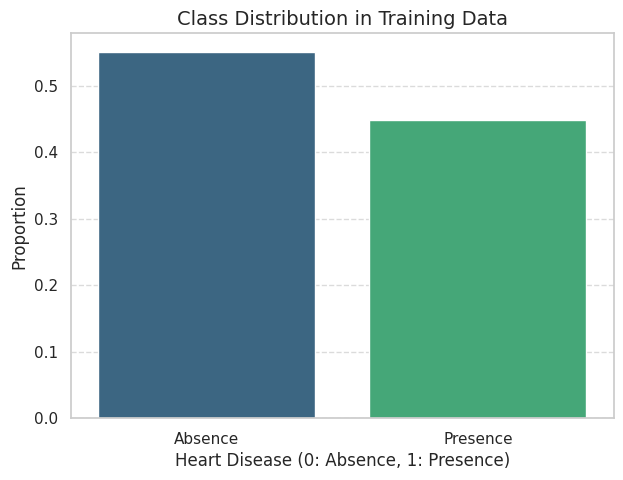

Class distribution visualization complete.


In [17]:
print("\n" + "="*80)
print("Analyzing Class Distribution in Training Data")
print("="*80)

class_counts = y_raw.value_counts()
print("\nClass Counts:")
print(class_counts)

class_proportions = y_raw.value_counts(normalize=True)
print("\nClass Proportions:")
print(class_proportions)

print("\nClass distribution analysis complete.")

plt.figure(figsize=(7, 5))
sns.barplot(x=class_proportions.index, y=class_proportions.values, palette='viridis')
plt.title('Class Distribution in Training Data', fontsize=14)
plt.xlabel('Heart Disease (0: Absence, 1: Presence)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Absence', 'Presence'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Class distribution visualization complete.")

In [18]:
print("\n" + "="*80)
print("Evaluating Class-Specific Metrics and Impact of Class Weights")
print("="*80)

# 1. Print a classification report
print("\nClassification Report (OOF Predictions with Optimal Threshold):\n")
print(classification_report(y_raw, y_pred_ensemble_train, target_names=['Absence (0)', 'Presence (1)']))


print("Class-specific metric evaluation complete.")


Evaluating Class-Specific Metrics and Impact of Class Weights

Classification Report (OOF Predictions with Optimal Threshold):

              precision    recall  f1-score   support

 Absence (0)       0.90      0.90      0.90    347546
Presence (1)       0.88      0.87      0.88    282454

    accuracy                           0.89    630000
   macro avg       0.89      0.89      0.89    630000
weighted avg       0.89      0.89      0.89    630000

Class-specific metric evaluation complete.


## <span style="font-size:0px; opacity:0; position:absolute;">8. Evaluate Model Performance & Visualize Results </span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 90%; /* Wider to fit the long title */
        max-width: 750px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 20px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.5em; /* Reduced size to prevent wrapping issues */
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
        ">
            Evaluate Model Performance & Visualize Results
        </span>    
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>       
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Confusion Matrix | Features | Scores
        </p>
    </div>
</div>


Evaluating Ensemble Model Performance on Training Data (OOF Predictions)

Calculating performance metrics...


2026-02-16 08:39:54,075 - tornado.application - ERROR - Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x791e1df4a980>>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py", line 104, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 163-164: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py", line 848, in send
    to_send = self.serialize(

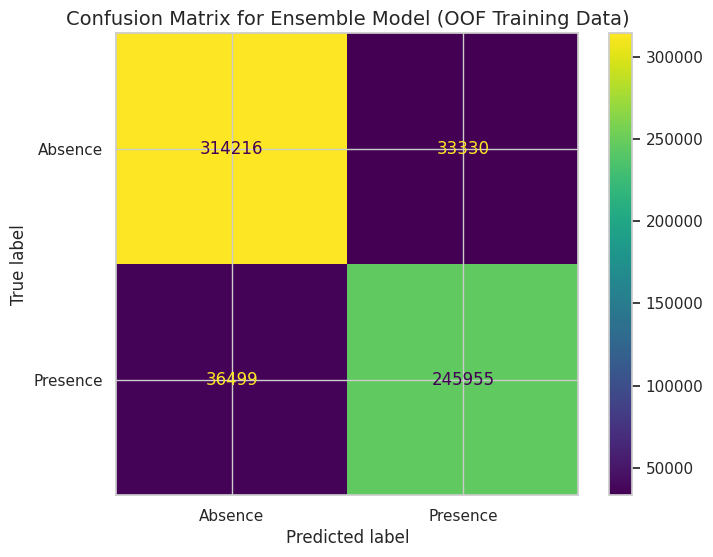

Confusion matrix displayed.

Generating Receiver Operating Characteristic (ROC) Curve for Ensemble Model (OOF) for the ensemble model...


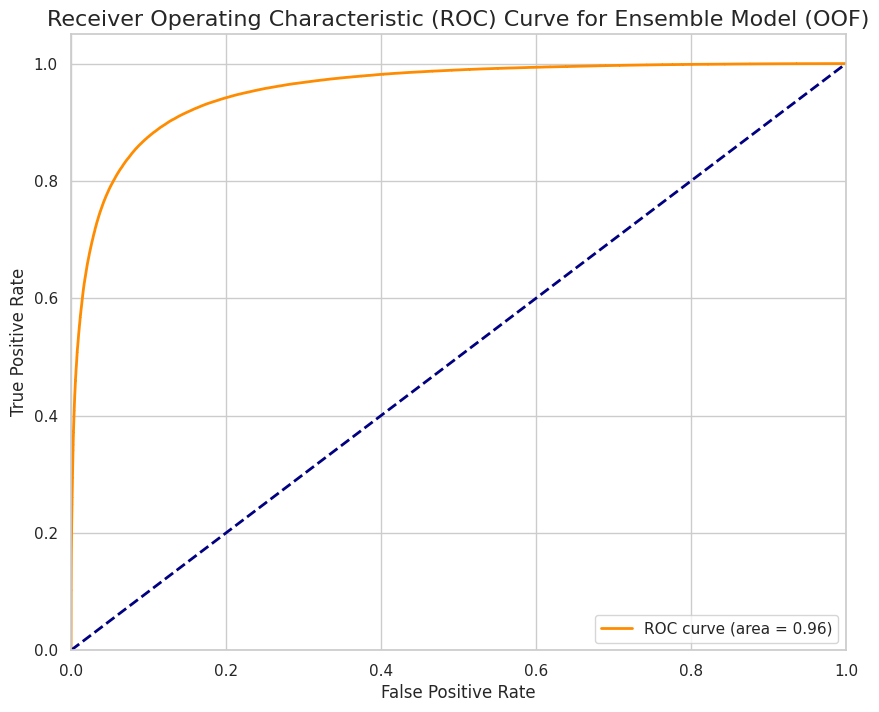

ROC Curve generated and displayed.

Attempting to visualize feature importances for CatBoost models within the Ensemble ensemble.

Visualizing Feature Importances...


/tmp/ipykernel_17/2417223863.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importances.head(N_TOP_FEATURES), palette='viridis')


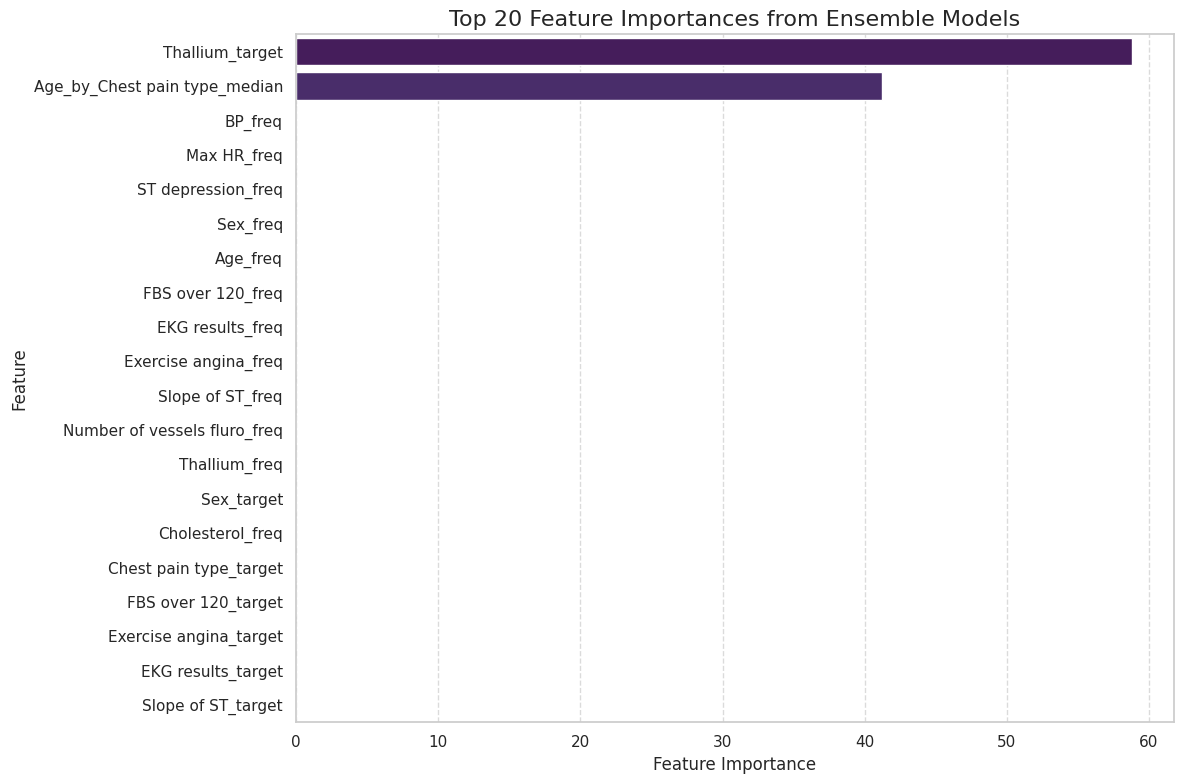

Feature importances visualization complete.


In [19]:
print("\n" + "="*80)
print(f"Evaluating {ACTIVE_MODEL} Model Performance on Training Data (OOF Predictions)")
print("="*80)

roc_auc, accuracy, f1, mcc = calculate_metrics(
    y_raw, y_proba_ensemble_train, y_pred_ensemble_train
)

print(f"\n\ud83d\udcca **{ACTIVE_MODEL} Model Performance on Training Data (OOF)**")
print(f"   - ROC AUC Score: {roc_auc:.4f}")
print(f"   - Accuracy Score: {accuracy:.4f}")
print(f"   - F1-Score: {f1:.4f}")
print(f"   - Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# 5. Visualize Results
plot_confusion_matrix(y_raw, y_pred_ensemble_train, title=f'Confusion Matrix for {ACTIVE_MODEL} Model (OOF Training Data)')
plot_roc_curve(y_raw, y_proba_ensemble_train, roc_auc, title=f'Receiver Operating Characteristic (ROC) Curve for {ACTIVE_MODEL} Model (OOF)')

catboost_models_in_ensemble = [m for m in trained_models if isinstance(m, CatBoostClassifier)]

if catboost_models_in_ensemble:
    print(f"\nAttempting to visualize feature importances for CatBoost models within the {ACTIVE_MODEL} ensemble.")
    plot_feature_importances(catboost_models_in_ensemble, X_train_engineered, N_TOP_FEATURES=20)
else:
    print(f"\nSkipping Feature Importances visualization: No CatBoost models found in the {ACTIVE_MODEL} ensemble, or not applicable for other model types like RealMLP.")

## <span style="font-size:0px; opacity:0; position:absolute;">9. Generate Submission File</span>
<div style="
    position: relative; 
    width: 100%; 
    height: 200px; 
    border-radius: 12px; 
    overflow: hidden; 
    background-color: #2c3e50;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.3);
">
    <div style="
        position: absolute; 
        top: 0; left: 0; width: 100%; height: 100%;
        background-image: url('https://i.pinimg.com/originals/52/d9/b3/52d9b35181578642c823f63a457fe99b.gif'); 
        background-size: cover; 
        background-position: center;
        filter: brightness(0.9); 
    "></div>
    <div style="
        position: absolute; 
        top: 50%; 
        left: 50%; 
        transform: translate(-50%, -50%);
        width: 80%; 
        max-width: 600px;
        background: rgba(20, 20, 35, 0.4); 
        backdrop-filter: blur(10px); 
        -webkit-backdrop-filter: blur(10px); 
        border: 1px solid rgba(255, 255, 255, 0.15);
        padding: 20px 30px; 
        border-radius: 15px; 
        text-align: center;
        color: white;
        box-shadow: 0 4px 30px rgba(0, 0, 0, 0.2);
    ">
        <span style="
            margin: 0; 
            font-family: 'Courier New', monospace; 
            font-weight: 800; 
            font-size: 1.8em; 
            letter-spacing: 3px; 
            text-transform: uppercase; 
            text-shadow: 0px 0px 10px rgba(255,255,255,0.6);
            color: #ffffff;
            white-space: nowrap; 
        ">
             Generate Submission File
        </span>   
        <div style="
            width: 40px; 
            height: 3px; 
            background: #00ffff; 
            margin: 10px auto; 
            border-radius: 2px;
            box-shadow: 0 0 10px #00ffff;
        "></div>    
        <p style="
            margin: 0; 
            font-family: 'Segoe UI', sans-serif; 
            font-size: 0.8em; 
            font-weight: 600; 
            letter-spacing: 2px; 
            opacity: 0.9;
            text-transform: uppercase;
        ">
            Submission
        </p>
    </div>
</div>

In [20]:
final_test_predictions_for_submission = all_test_predictions

print("\n" + "✨"*10 + " FINAL RESULTS " + "✨"*10)
print("="*80)

print(f"\n📊 **Ensemble Model Performance on Training Data**")
print(f"   - ROC AUC Score: {roc_auc:.4f}")
print(f"   - Accuracy Score: {accuracy:.4f}")
print(f"   - F1-Score: {f1:.4f}")
print(f"   - Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\n" + "="*80)

# --- Diagnostic prints for length mismatch ---
print(f"Length of test_ids: {len(test_ids)}")
print(f"Length of final_test_predictions_for_submission: {len(final_test_predictions_for_submission)}")
# ----------------------------------------------

generate_submission(
    [final_test_predictions_for_submission], test_ids,
    output_filename=f'submission.csv'
)

print("\n" + "="*80)
print("✨ MODELING PIPELINE COMPLETE! ✨")
print("="*80)


✨✨✨✨✨✨✨✨✨✨ FINAL RESULTS ✨✨✨✨✨✨✨✨✨✨

📊 **Ensemble Model Performance on Training Data**
   - ROC AUC Score: 0.9554
   - Accuracy Score: 0.8892
   - F1-Score: 0.8757
   - Matthews Correlation Coefficient (MCC): 0.7757

Length of test_ids: 270000
Length of final_test_predictions_for_submission: 270000
Generating final ensemble predictions and submission file...

✓ Submission file 'submission.csv' created successfully.
   First 5 rows of the submission file:


,id,Heart Disease
0,630000,0.940979
1,630001,0.037829
2,630002,0.961583
3,630003,0.037380
4,630004,0.137793



✨ MODELING PIPELINE COMPLETE! ✨
